#**Title: Rossmann Retail Store Sales Prediction**

## **1. Problem Statement**
Rossmann, one of the largest drug store chains in Europe, operates over 3,000 drug stores in 7 European countries. Rossmann store managers are asked to predict their daily sales for up to six weeks in advance.
Store sales are influenced by several factors, such as promotions, competition, holidays, seasona, locality, etc. With thousands of individual managers predicting sales based on their unique circumstances, the results are not accurate.

The data provided contains information about historical sales of 1,115 Rossmann stores. Some stores are temporarily closed for refurbishment. The problem here is to build an ML model to forecast the sales of stores.   


###**Business Goal**
The goal is to analyse the historical data of the stores to get actionable insights and predict the sales of each Rossmann store. The predictions can be used by the store managers and the marketing teams to plan things in advance and improve their performance.

##**2. Data Description & Loading**
We are provided with two data sets:
1. **Rossmann Stores Data:** It contains the historical data including sales.
2. **Stores:** It contains the additional information about the stores.

The two data sets contain the following features:
1.  **Store:** A unique ID for each store
2.  **DayofWeek:** Particular day in a week.
3.  **Date:** Particular date.
4.  **Sales:** The turnover for any given day (Dependent/Target Variable)
5.  **Customers:** The number of customers on a given day
6.  **Open:** An indicator for whether the store was open: 0 = closed, 1 = open
7.  **StateHoliday:** Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
8. **SchoolHoliday:** Indicates if the (Store, Date) was affected by the closure of public schools
9. **StoreType:** Differentiates between 4 different store models: a, b, c, d
10. **Assortment:** Describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
11. **CompetitionDistance:** Distance in meters to the nearest competitor store
12. **CompetitionOpenSince:** [Month/Year] Gives the approximate year and month of the time the nearest competitor was opened
13. **Promo:** Indicates whether a store is running a promo on that day
14. **Promo2:** Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
15. **Promo2Since:** [Year/Week] Describes the year and calendar week when the store started participating in Promo2
17. **PromoInterval:** Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
# Importing the required packages

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
# %matplotlib inline # Not required in Google Colab

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the datasets

stores_data = pd.read_csv("/content/drive/MyDrive/Data Science/Projects/Rossmann Retail Store Sales Prediction | Classification/Rossmann Stores Data.csv")
additional_data = pd.read_csv("/content/drive/MyDrive/Data Science/Projects/Rossmann Retail Store Sales Prediction | Classification/store.csv")

In [4]:
stores_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [5]:
stores_data.shape

(1017209, 9)

In [6]:
stores_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
stores_data['Store'].unique().shape
# There are total 1115 unique stores

(1115,)

In [8]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are no null values in the stores dataframe

In [9]:
len(stores_data[stores_data.duplicated()])

0

There are no duplicate values in stores dataframe

In [10]:
additional_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
additional_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We can observe that is a presence of null values in CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval. We will handle them moving forward.

In [13]:
additional_data.isnull().sum().sort_values(ascending = False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

In [14]:
len(additional_data[additional_data.duplicated()])

0

There are no duplicate values in additiona_data dataframe

##**3. Data Cleaning**

There is no presence of null values in stores_data dataframe, but we can observe their presence in additional_data dataframe.

The following columns in 'additional_data' dataframe have null values:
1. CompetitionDistance:
2. CompetitionOpenSinceMonth
3. CompetitionOpenSinceYear
4. Promo2SinceWeek
5. Promo2SinceYear
6. PromoInterval

Let us handle them now!


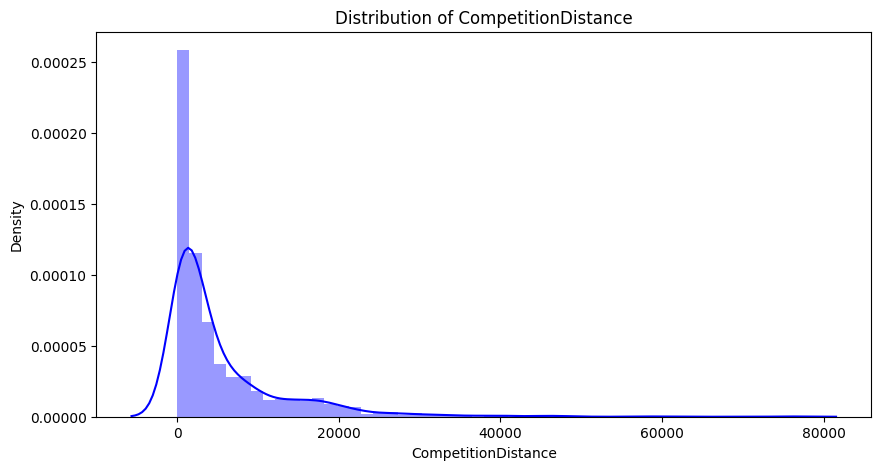

In [15]:
# Plotting the distribution graph of 'CompetitionDistance' to analyse the data distribution

sns.distplot(additional_data['CompetitionDistance'], color = 'Blue')
plt.title("Distribution of CompetitionDistance")
plt.show()

From the above graph of CompetitionDistance, we can observe that the distribution is skewed on the right (Right Skewed). Most of the values are towards the left.

Therefore median (robust to outlier effect) can be used to replace null values.

In [16]:
# Replacing the null values of CompetitionDistance with median.

additional_data['CompetitionDistance'].fillna(additional_data['CompetitionDistance'].median(), inplace = True)

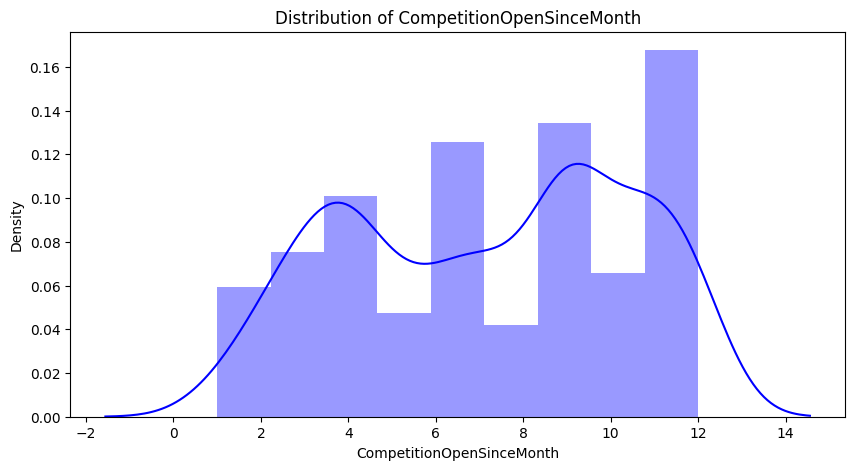

In [17]:
# Plotting the distribution graph of 'CompetitionOpenSinceMonth' to analyse the data distribution

sns.distplot(additional_data['CompetitionOpenSinceMonth'], color = 'Blue')
plt.title("Distribution of CompetitionOpenSinceMonth")
plt.show()

In [18]:
# The values of CompetitionOpenSinceMonth are discrete. So we can replace the null values with mode.
additional_data['CompetitionOpenSinceMonth'].fillna(additional_data['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

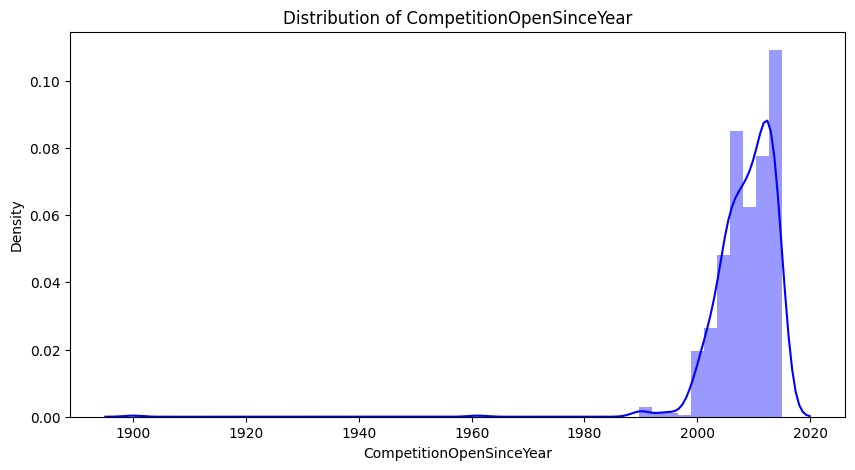

In [19]:
# Plotting the distribution graph of 'CompetitionOpenSinceYear' to analyse the data distribution

sns.distplot(additional_data['CompetitionOpenSinceYear'], color = 'Blue')
plt.title("Distribution of CompetitionOpenSinceYear")
plt.show()

In [20]:
# The values of CompetitionOpenSinceYear are also discrete (like CompetitionOpenSinceMonth). So we can replace the null values with mode.
additional_data['CompetitionOpenSinceYear'].fillna(additional_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [21]:
additional_data[additional_data['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN


We can observe that Promo2SinceWeek, Promo2SinceYear & PromoInterval are null, when Promo2 is 0.

So, we can replace null values in these columns with 0.

In [22]:
additional_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
additional_data['Promo2SinceYear'].fillna(value=0,inplace=True)
additional_data['PromoInterval'].fillna(value=0,inplace=True)

In [23]:
additional_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

All  null values have been removed.

## **4. Exploratory Data Analysis**

Before exploring the data, let us first combine the two data sets.

In [24]:
# Merging two datasets to form a new dataset

combined_dataset = pd.merge(stores_data, additional_data, how = 'left', on = 'Store')
# Joining on 'Store' column which is present on both DataFrames using 'left join'

In [25]:
combined_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [27]:
combined_dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### **4.1 Analysing the distribution of Sales**

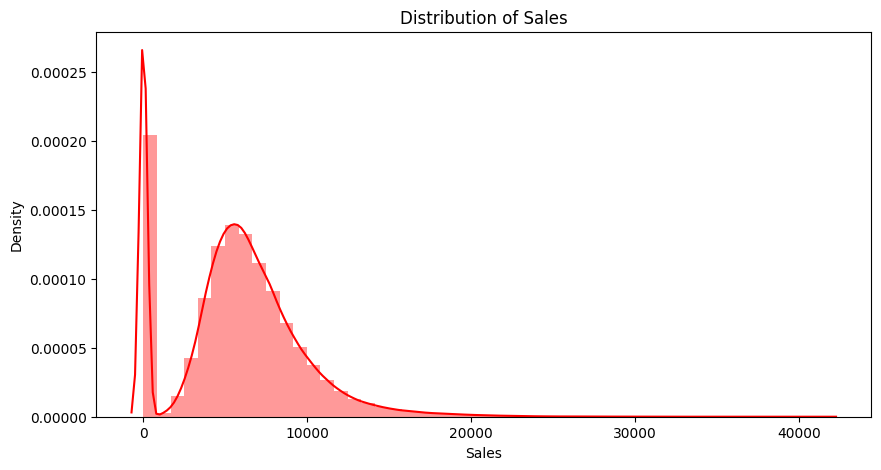

In [28]:
sns.distplot(combined_dataset['Sales'], color = 'Red')
plt.title("Distribution of Sales")
plt.show()

We see peak at '0' Sales because many stores were closed due to refurbishment.

So, zero sales is showing as the highest.

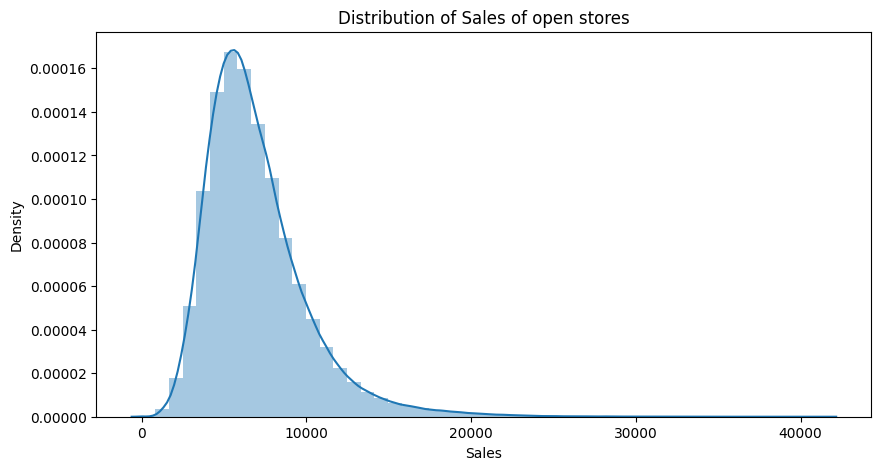

In [29]:
sns.distplot(combined_dataset[combined_dataset['Open']== 1]['Sales'])
plt.title("Distribution of Sales of open stores")
plt.show()

This seams like corrected. (But skewed)

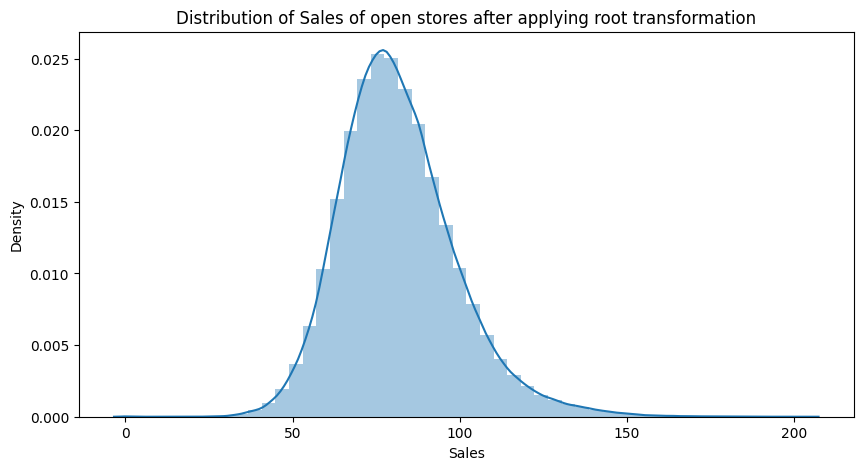

In [30]:
# Applying root transformation to remove skewness
sns.distplot(np.sqrt(combined_dataset[combined_dataset['Open']== 1]['Sales']))
plt.title("Distribution of Sales of open stores after applying root transformation")
plt.show()

### **4.2 Store wise sales**

In [31]:
# Finding the store wise sales

store_wise_sales = combined_dataset.groupby('Store')['Sales'].sum().reset_index()
store_wise_sales.head()

,Store,Sales
0,1,3716854
1,2,3883858
2,3,5408261
3,4,7556507
4,5,3642818


#### **4.2.1 Top five stores**

In [32]:
# Top five stores in terms of sales

top_five_sales = store_wise_sales.sort_values(by = 'Sales', ascending = False).head()
top_five_sales

,Store,Sales
261,262,19516842
816,817,17057867
561,562,16927322
1113,1114,16202585
250,251,14896870


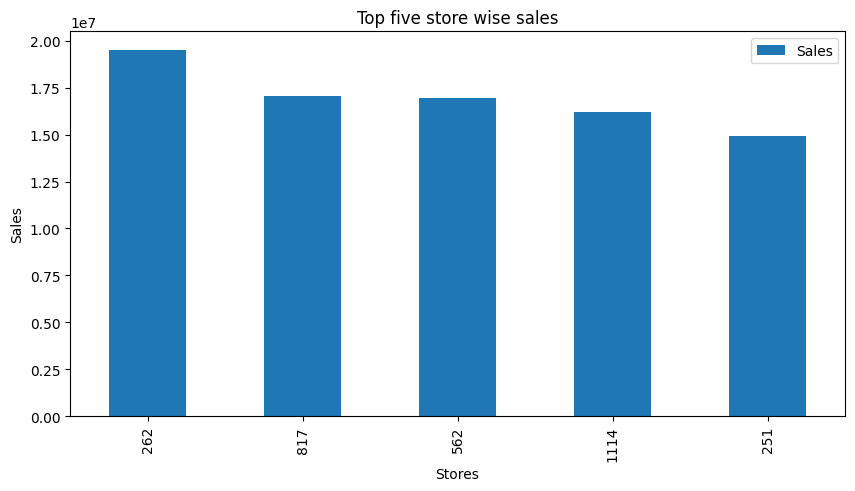

In [33]:
top_five_sales.plot(kind = 'bar', x ='Store', y ='Sales')
plt.title('Top five store wise sales')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()

# sns.barplot(x = top_five_sales['Store'], y = top_five_sales['Sales'], order = top_five_sales['Store'])

#### **4.2.2 Last five stores**

In [34]:
# Last five stores in terms of sales

last_five_sales = store_wise_sales.sort_values(by ='Sales', ascending = True).head()
last_five_sales

,Store,Sales
306,307,2114322
542,543,2179287
197,198,2268273
207,208,2302052
262,263,2306075


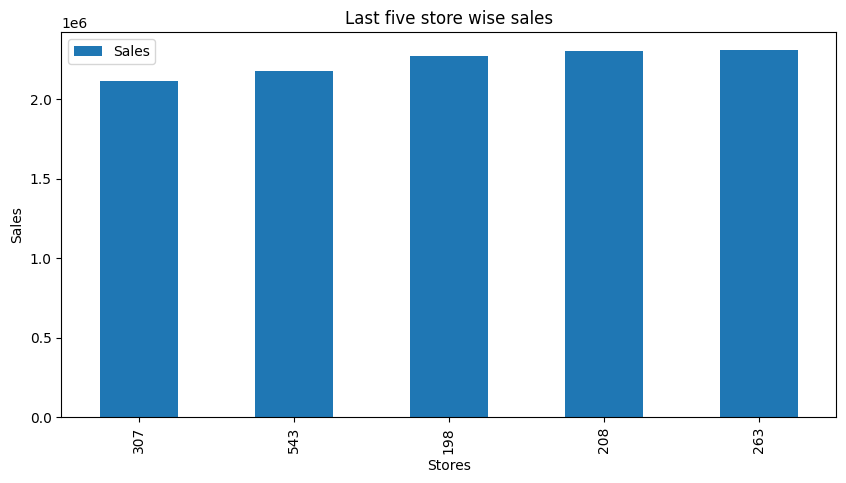

In [35]:
last_five_sales.plot(kind = 'bar', x ='Store', y ='Sales')
plt.title('Last five store wise sales')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()

# sns.barplot(x = last_five_sales['Store'], y = last_five_sales['Sales'], order = last_five_sales['Store'])

#### **4.2.3 Avg sales of open stores**

In [36]:
# Open & Close days of stores
open_close_stores = combined_dataset['Open'].value_counts()
open_close_stores.reset_index()

,index,Open
0,1,844392
1,0,172817


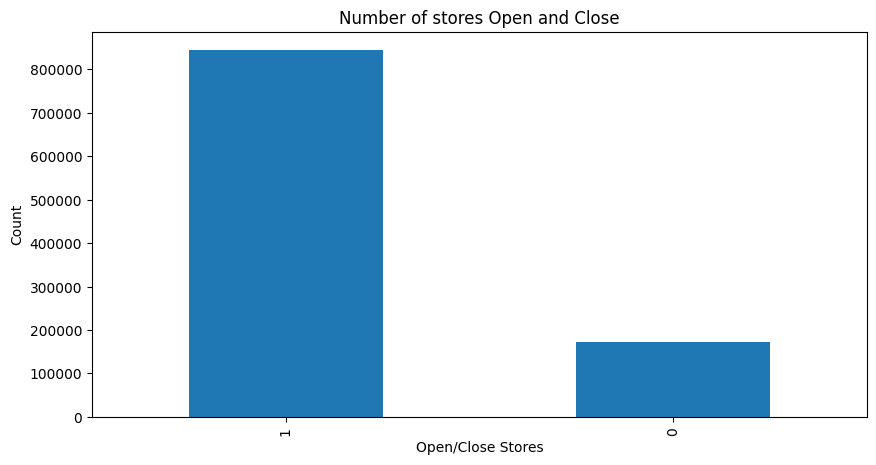

In [37]:
open_close_stores.plot(kind = 'bar')
plt.title('Number of stores Open and Close')
plt.xlabel('Open/Close Stores')
plt.ylabel('Count')
plt.show()

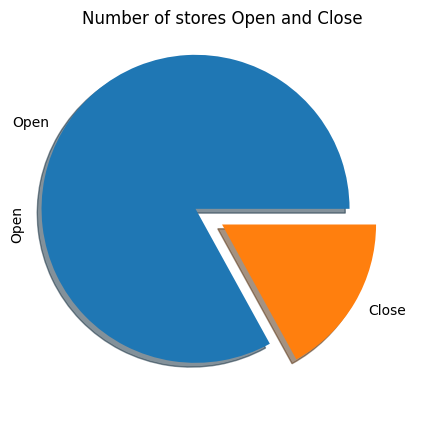

In [38]:
mylabels = ['Open', 'Close']
myexplode = [0.2, 0]
open_close_stores.plot(kind = 'pie', labels = mylabels, explode = myexplode, shadow = True)
plt.title('Number of stores Open and Close')
plt.show()

In [39]:
# 'number of days open' of each store.
store_open_days = combined_dataset.groupby('Store')['Open'].sum().reset_index()
store_open_days

,Store,Open
0,1,781
1,2,784
2,3,779
3,4,784
4,5,779
...,...,...
1110,1111,779
1111,1112,779
1112,1113,784
1113,1114,784


In [40]:
store_open_days.sort_values('Open',ascending=False).rename(columns={'Open':'Open Days'})

,Store,Open Days
768,769,942
1096,1097,942
84,85,942
561,562,942
261,262,942
...,...,...
908,909,607
99,100,606
743,744,605
347,348,597


In [41]:
# Calculating avg sales of each store for open days
# This helps to evaluate performance of each store irrespective of number of days open
avgsale_open_days = combined_dataset[combined_dataset['Open']== 1].groupby('Store')['Sales'].mean().reset_index()
avgsale_open_days.rename(columns = {'Sales': 'Avg Sales'})

,Store,Avg Sales
0,1,4759.096031
1,2,4953.900510
2,3,6942.568678
3,4,9638.401786
4,5,4676.274711
...,...,...
1110,1111,5251.702182
1111,1112,10236.577664
1112,1113,6627.859694
1113,1114,20666.562500


In [42]:
avgsale_open_days.sort_values('Sales').rename(columns = {'Sales': 'Avg Sales'})

,Store,Avg Sales
306,307,2703.736573
542,543,2790.380282
197,198,2900.604859
207,208,2936.290816
840,841,2972.608974
...,...,...
841,842,18574.795820
250,251,19123.068036
1113,1114,20666.562500
261,262,20718.515924


#### **4.2.4 Store type wise sales**

In [43]:
# Store type store count
store_type_count = combined_dataset.groupby('StoreType')['Store'].count()
store_type_count.reset_index().rename(columns = {'Store':'Store Count'})

,StoreType,Store Count
0,a,551627
1,b,15830
2,c,136840
3,d,312912


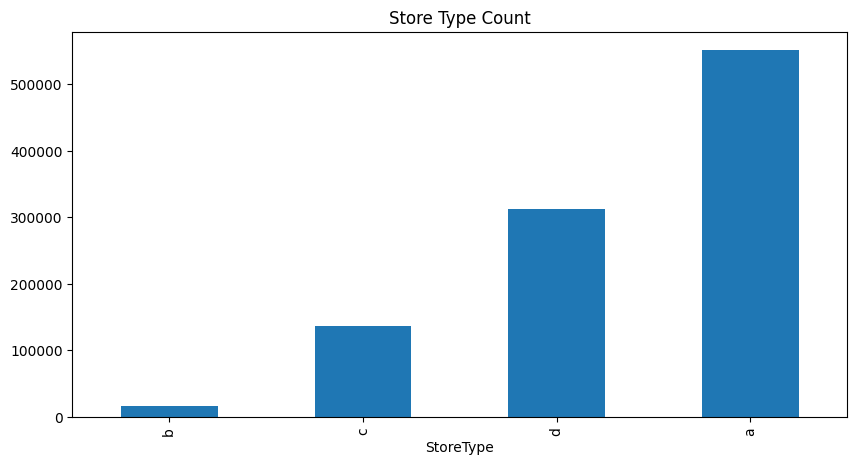

In [44]:
store_type_count.sort_values().plot(kind = 'bar')
plt.title('Store Type Count')
plt.show()

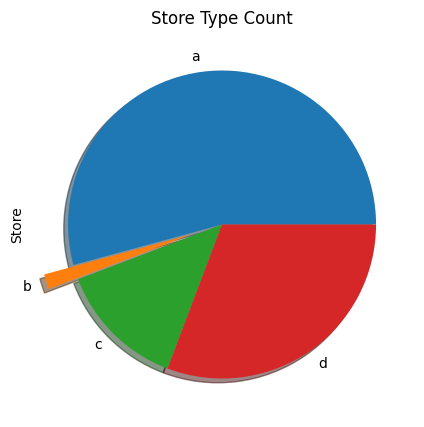

In [45]:
myexplode = [0, 0.2, 0, 0]
store_type_count.plot(kind = 'pie', explode = myexplode, shadow = True)
plt.title('Store Type Count')
plt.show()

Most of the number of stores are type 'a', while the least are type 'b'

In [46]:
# Store type sales
store_type_sales = combined_dataset.groupby('StoreType')['Sales'].sum()
store_type_sales.reset_index().rename(columns = {'Sales': 'Total Sales'})

,StoreType,Total Sales
0,a,3165334859
1,b,159231395
2,c,783221426
3,d,1765392943


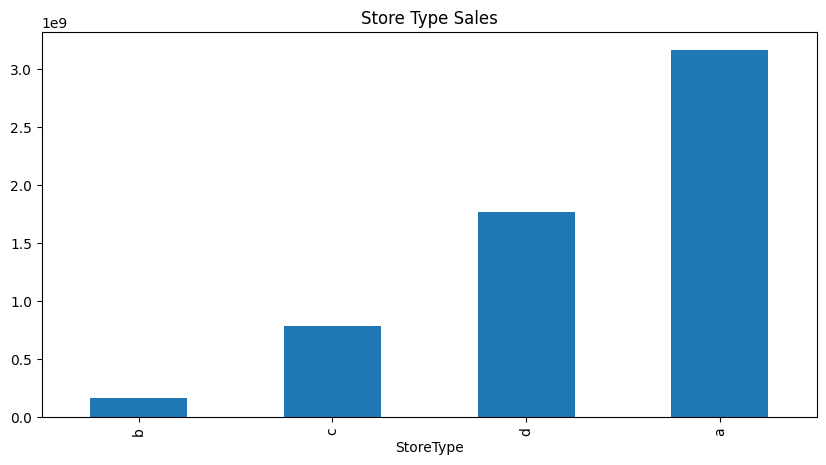

In [47]:
store_type_sales.sort_values().plot(kind = 'bar')
plt.title('Store Type Sales')
plt.show()

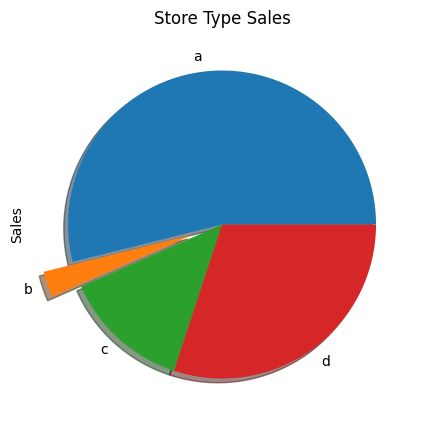

In [48]:
myexplode = [0, 0.2, 0, 0]
store_type_sales.plot(kind = 'pie', explode = myexplode, shadow = True)
plt.title('Store Type Sales')
plt.show()

### **4.3 Year wise sales**

In [49]:
# Extracting 'Year', 'Month' and 'Day' from the 'Date' column
# This helps in doing timeline analysis

combined_dataset['Date'] = pd.to_datetime(combined_dataset['Date']) # Changing the date column format from 'string' to 'datetime'
combined_dataset['Year'] = combined_dataset['Date'].dt.year         # int64
combined_dataset['Month'] = combined_dataset['Date'].dt.month       # int64
combined_dataset['Day'] = combined_dataset['Date'].dt.day           # int64

In [50]:
# Checking the type of 'Date' column
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [51]:
# Year wise sales
yearly_sales = combined_dataset.groupby('Year')['Sales'].sum().reset_index()
yearly_sales

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


Year '2013' recorded the highest number of sales.  

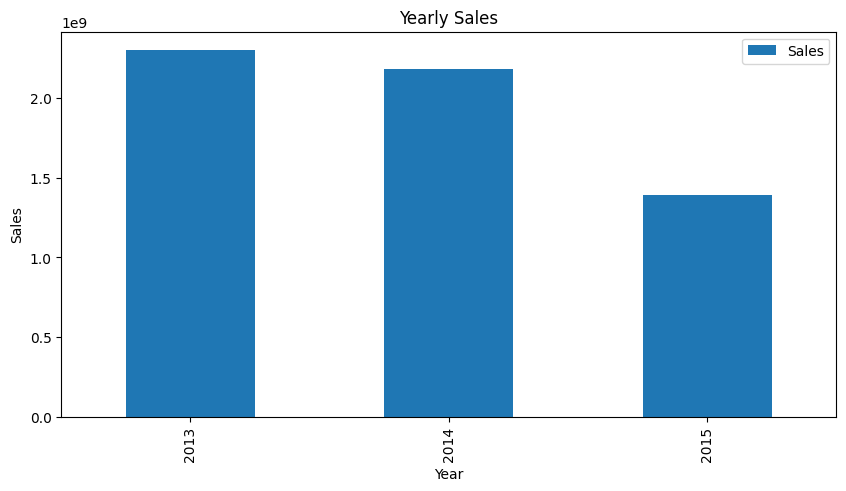

In [52]:
yearly_sales.plot(kind = 'bar', x = 'Year', y = 'Sales')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# sns.barplot(x = yearly_sales['Year'], y = yearly_sales['Sales'])

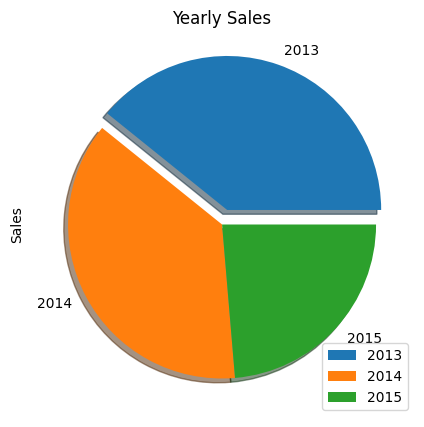

In [53]:
myexplode = [0.1, 0, 0]
yearly_sales.plot(kind = 'pie', x = 'Year', y = 'Sales', labels = yearly_sales['Year'], explode = myexplode, shadow = True)
plt.title('Yearly Sales')
plt.show()

### **4.4 Month wise sales**

In [54]:
# Month wise sales
monthly_sales = combined_dataset.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

,Month,Sales
0,1,503402518
1,2,533417977
2,3,563596319
3,4,581521347
4,5,566298388
5,6,539382249
6,7,571128812
7,8,411747857
8,9,374112224
9,10,388630287


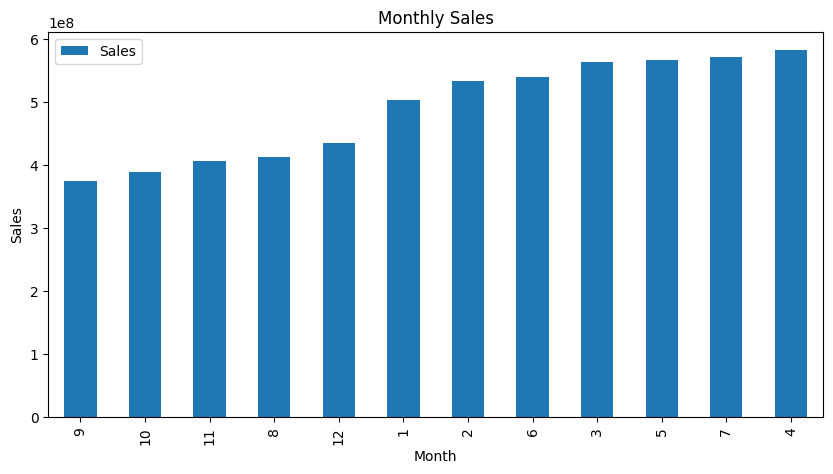

In [55]:
monthly_sales.sort_values(by = 'Sales').plot(kind = 'bar', x = 'Month', y = 'Sales')
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# sns.barplot(x = monthly_sales['Month'], y = monthly_sales['Sales'])

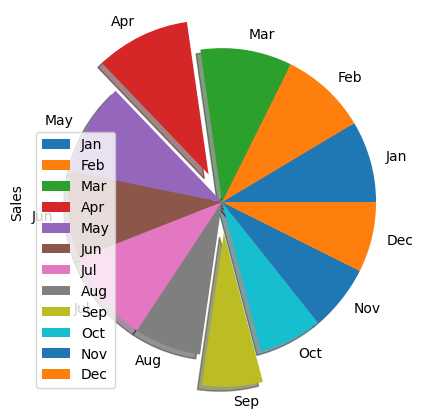

In [56]:
mylabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
myexplode = [0, 0, 0, 0.2, 0, 0, 0, 0, 0.2, 0, 0, 0]
monthly_sales.plot(kind = 'pie', x = 'Month', y = 'Sales', labels = mylabels, explode = myexplode, shadow = True)
plt.show()

#### **4.4.1 Month wise sales of Year 2013**

In [57]:
# Monthly Sales of 2013
Monthly_Sales_2013 = combined_dataset[combined_dataset['Year']==2013].groupby('Month')['Sales'].sum().reset_index()
Monthly_Sales_2013

,Month,Sales
0,1,157389163
1,2,186699586
2,3,189693740
3,4,201295752
4,5,208191510
5,6,178829767
6,7,205276262
7,8,203898063
8,9,179202793
9,10,176187828


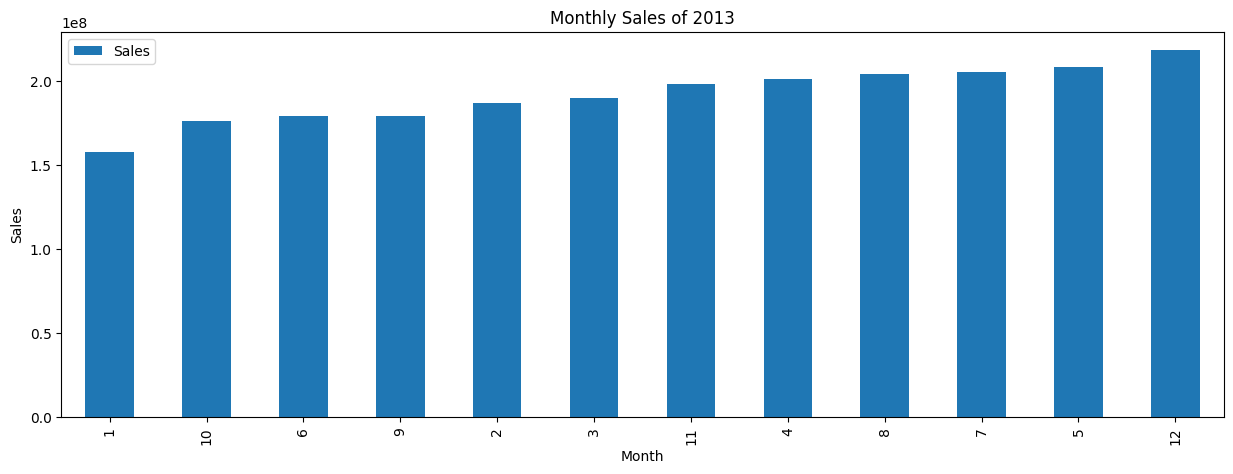

In [58]:
Monthly_Sales_2013.sort_values(by = 'Sales').plot(kind = 'bar', x = 'Month', y = 'Sales')
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Monthly Sales of 2013')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
# sns.barplot(x = Monthly_Sales_2013['Month'], y = Monthly_Sales_2013['Sales'])

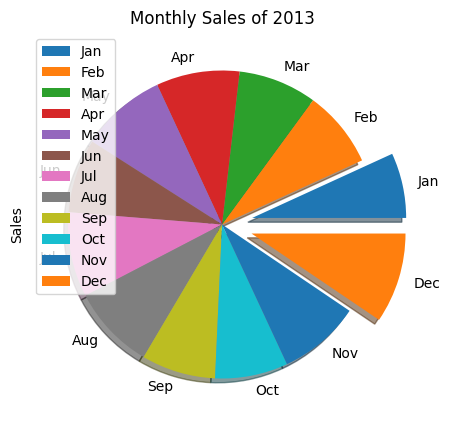

In [59]:
mylabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
Monthly_Sales_2013.plot(kind = 'pie', x = 'Month', y = 'Sales', labels = mylabels, explode = myexplode, shadow = True)
plt.title('Monthly Sales of 2013')
plt.show()

#### **4.4.2 Month wise sales of Year 2014**

In [60]:
# Monthly Sales of 2014
Monthly_Sales_2014 = combined_dataset[combined_dataset['Year']==2014].groupby('Month')['Sales'].sum().reset_index()
Monthly_Sales_2014

,Month,Sales
0,1,187135462
1,2,177261187
2,3,203204367
3,4,202809404
4,5,198162274
5,6,191845606
6,7,182327255
7,8,170055032
8,9,146200110
9,10,173097998


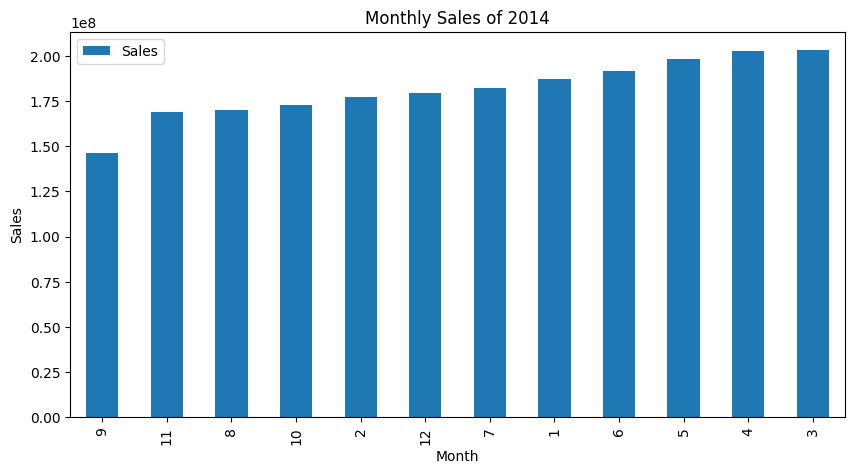

In [61]:
Monthly_Sales_2014.sort_values(by = 'Sales').plot(kind = 'bar', x = 'Month', y = 'Sales')
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Monthly Sales of 2014')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
# sns.barplot(x = Monthly_Sales_2014['Month'], y = Monthly_Sales_2014['Sales'])

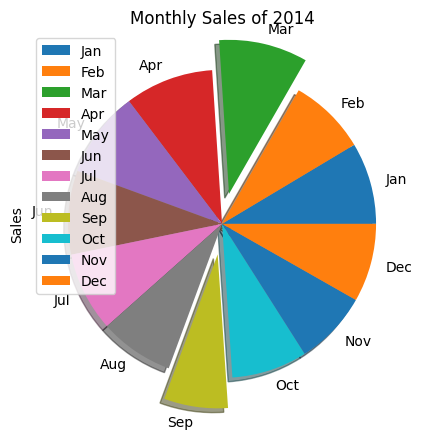

In [62]:
mylabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
myexplode = [0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0, 0, 0]
Monthly_Sales_2014.plot(kind = 'pie', x = 'Month', y = 'Sales', labels = mylabels, explode = myexplode, shadow = True)
plt.title('Monthly Sales of 2014')
plt.show()

#### **4.4.3  Month wise sales of Year 2015**

In [63]:
# Monthly Sales of 2015
Monthly_Sales_2015 = combined_dataset[combined_dataset['Year']==2015].groupby('Month')['Sales'].sum().reset_index()
Monthly_Sales_2015

,Month,Sales
0,1,158877893
1,2,169457204
2,3,170698212
3,4,177416191
4,5,159944604
5,6,168706876
6,7,183525295
7,8,37794762
8,9,48709321
9,10,39344461


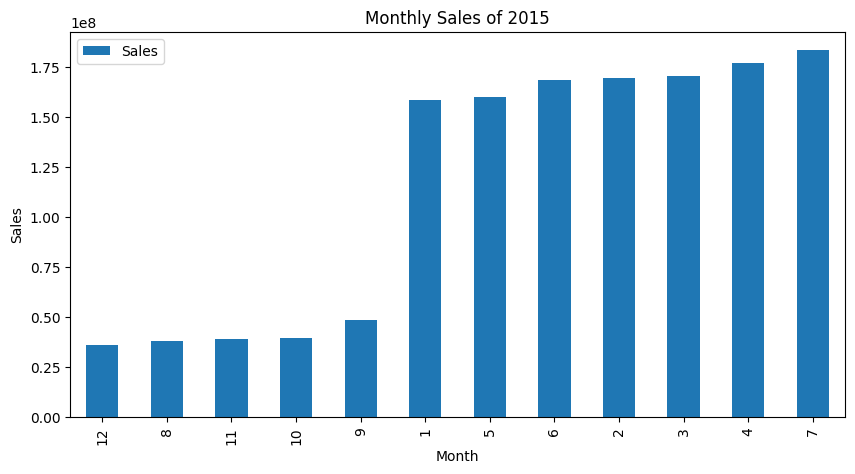

In [64]:
Monthly_Sales_2015.sort_values(by = 'Sales').plot(kind = 'bar', x = 'Month', y = 'Sales')
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Monthly Sales of 2015')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
# sns.barplot(x = Monthly_Sales_2015['Month'], y = Monthly_Sales_2015['Sales'])

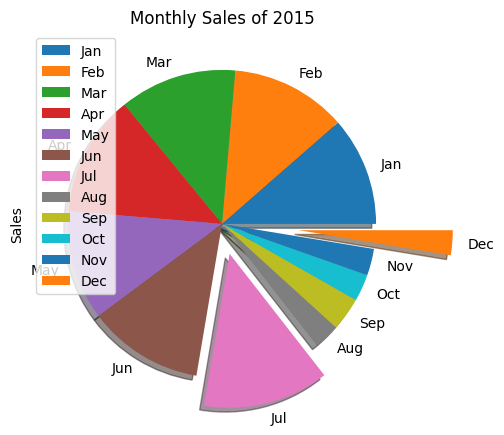

In [65]:
mylabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
myexplode = [0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0.5]
Monthly_Sales_2015.plot(kind = 'pie', x = 'Month', y = 'Sales', labels = mylabels, explode = myexplode, shadow = True)
plt.title('Monthly Sales of 2015')
plt.show()

### **4.5 DayOfWeek wise sales**

In [66]:
# Day wise sales of all 3 years
day_of_week_sales = combined_dataset.groupby('DayOfWeek')['Sales'].sum().reset_index()
day_of_week_sales

,DayOfWeek,Sales
0,1,1130203012
1,2,1020411930
2,3,954962863
3,4,911177709
4,5,980555941
5,6,846317735
6,7,29551433


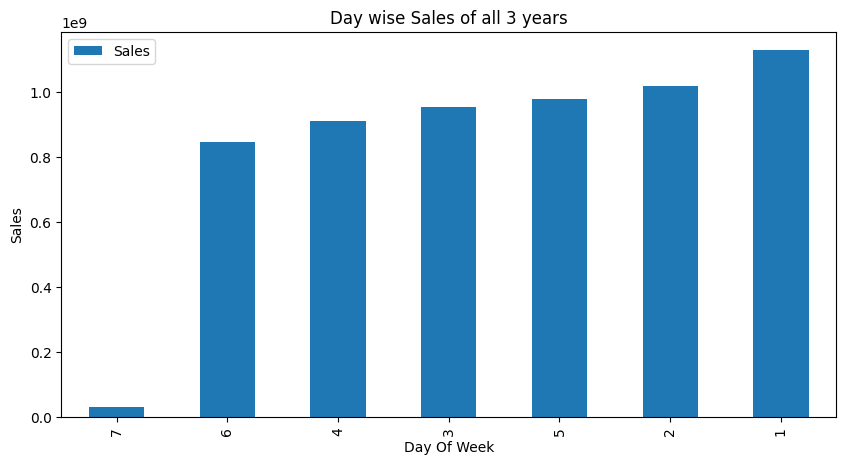

In [67]:
plt.rcParams['figure.figsize'] = (10,5)
day_of_week_sales.sort_values(by = 'Sales').plot(kind = 'bar', x = 'DayOfWeek', y = 'Sales')
plt.title('Day wise Sales of all 3 years')
plt.xlabel('Day Of Week')
plt.ylabel('Sales')
plt.show()

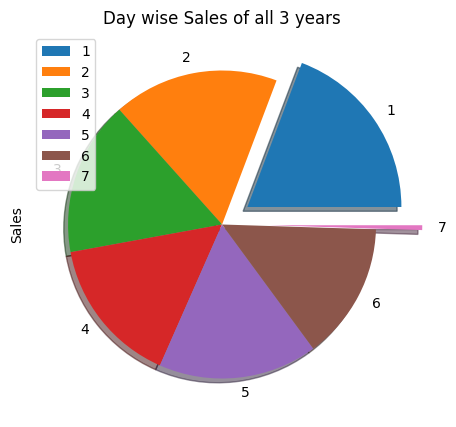

In [68]:
myexplode = [0.2, 0, 0, 0, 0, 0, 0.3]
day_of_week_sales.plot(kind = 'pie', x = 'DayOfWeek', y = 'Sales', labels = day_of_week_sales['DayOfWeek'], explode = myexplode, shadow = True)
plt.title('Day wise Sales of all 3 years')
plt.show()

#### **4.5.1 DayOfWeek wise sales of Year 2013**

In [69]:
# Day wise sales of 2013
day_of_week_sales_2013 = combined_dataset[combined_dataset['Year']==2013].groupby('DayOfWeek')['Sales'].sum().reset_index()
day_of_week_sales_2013

,DayOfWeek,Sales
0,1,448805308
1,2,394617586
2,3,366055367
3,4,357566151
4,5,391034639
5,6,334045822
6,7,10751211


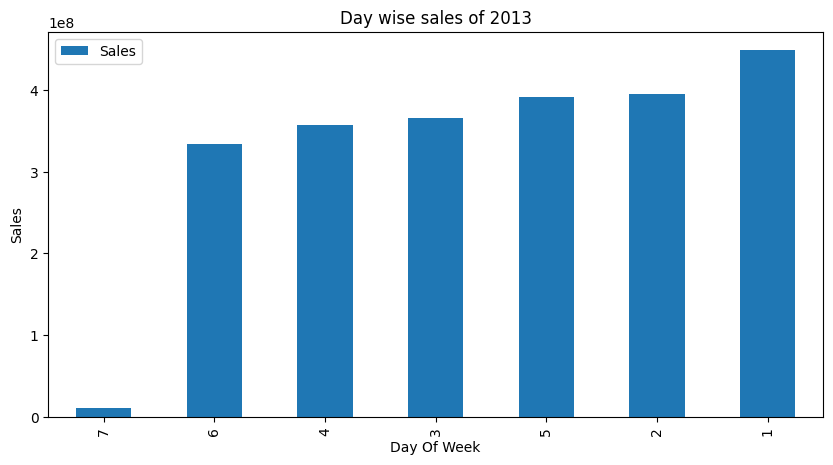

In [70]:
day_of_week_sales_2013.sort_values(by = 'Sales').plot(kind = 'bar', x = 'DayOfWeek', y = 'Sales')
plt.title('Day wise sales of 2013')
plt.xlabel('Day Of Week')
plt.ylabel('Sales')
plt.show()

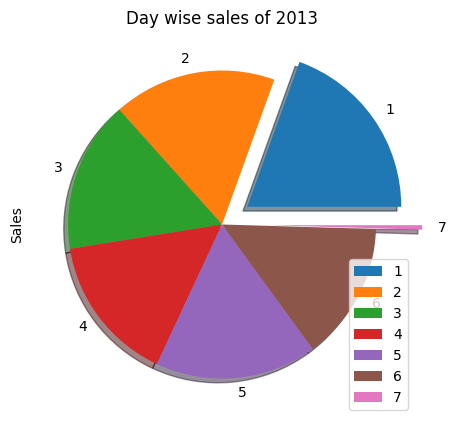

In [71]:
myexplode = [0.2, 0, 0, 0, 0, 0, 0.3]
day_of_week_sales_2013.plot(kind = 'pie', x = 'DayOfWeek', y = 'Sales', labels = day_of_week_sales['DayOfWeek'], explode = myexplode, shadow = True)
plt.title('Day wise sales of 2013')
plt.legend(loc = 'lower right')
plt.show()

#### **4.5.2 DayOfWeek wise sales of Year 2014**

In [72]:
# Day wise sales of 2014
day_of_week_sales_2014 = combined_dataset[combined_dataset['Year']==2014].groupby('DayOfWeek')['Sales'].sum().reset_index()
day_of_week_sales_2014

,DayOfWeek,Sales
0,1,421902297
1,2,385086977
2,3,357302036
3,4,334780996
4,5,359487036
5,6,310593431
6,7,11652123


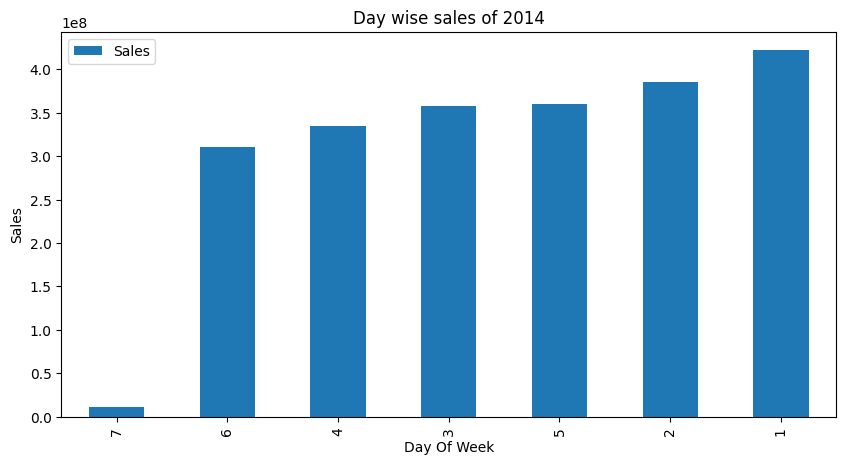

In [73]:
day_of_week_sales_2014.sort_values(by = 'Sales').plot(kind = 'bar', x = 'DayOfWeek', y = 'Sales')
plt.title('Day wise sales of 2014')
plt.xlabel('Day Of Week')
plt.ylabel('Sales')
plt.show()

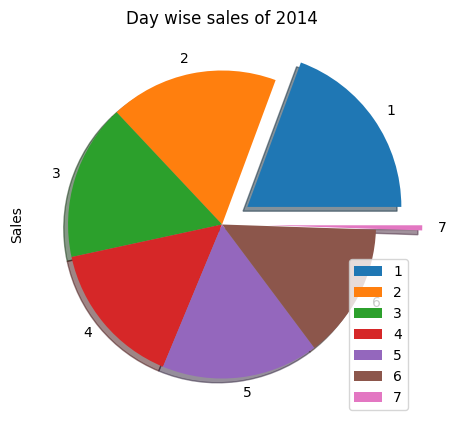

In [74]:
myexplode = [0.2, 0, 0, 0, 0, 0, 0.3]
day_of_week_sales_2014.plot(kind = 'pie', x = 'DayOfWeek', y = 'Sales', labels = day_of_week_sales['DayOfWeek'], explode = myexplode, shadow = True)
plt.title('Day wise sales of 2014')
plt.show()

#### **4.5.3 DayOfWeek wise sales of Year 2015**

In [75]:
# Day wise sales of 2015
day_of_week_sales_2015 = combined_dataset[combined_dataset['Year']==2014].groupby('DayOfWeek')['Sales'].sum().reset_index()
day_of_week_sales_2015

,DayOfWeek,Sales
0,1,421902297
1,2,385086977
2,3,357302036
3,4,334780996
4,5,359487036
5,6,310593431
6,7,11652123


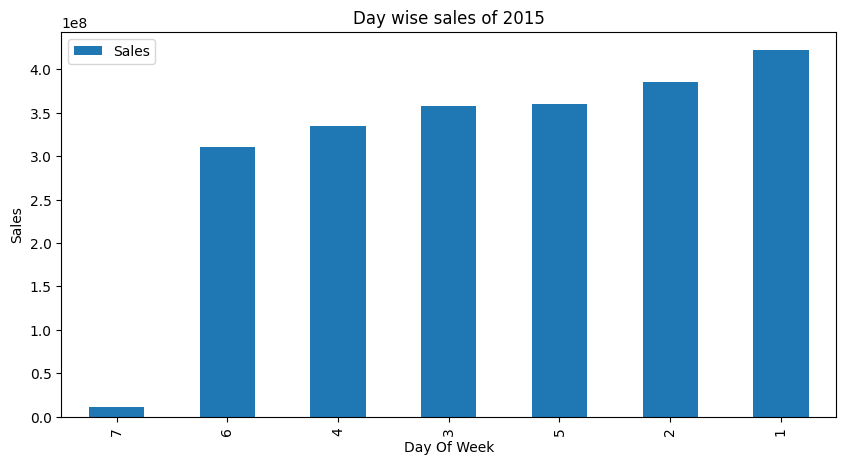

In [76]:
day_of_week_sales_2015.sort_values(by = 'Sales').plot(kind = 'bar', x = 'DayOfWeek', y = 'Sales')
plt.title('Day wise sales of 2015')
plt.xlabel('Day Of Week')
plt.ylabel('Sales')
plt.show()

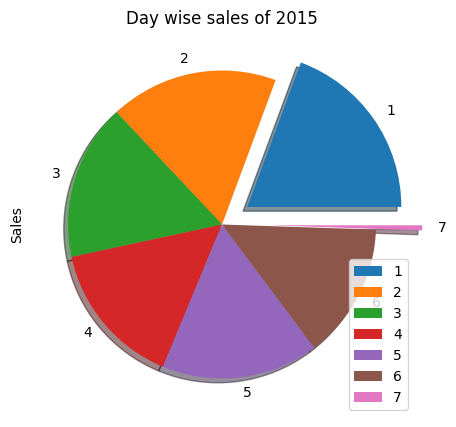

In [77]:
myexplode = [0.2, 0, 0, 0, 0, 0, 0.3]
day_of_week_sales_2015.plot(kind = 'pie', x = 'DayOfWeek', y = 'Sales', labels = day_of_week_sales['DayOfWeek'], explode = myexplode, shadow = True)
plt.title('Day wise sales of 2015')
plt.show()

### **4.6 Assortment wise sales**

In [78]:
# Assortment type store count
assrt_store_count = combined_dataset.groupby('Assortment')['Store'].count().reset_index()
assrt_store_count

,Assortment,Store
0,a,537445
1,b,8294
2,c,471470


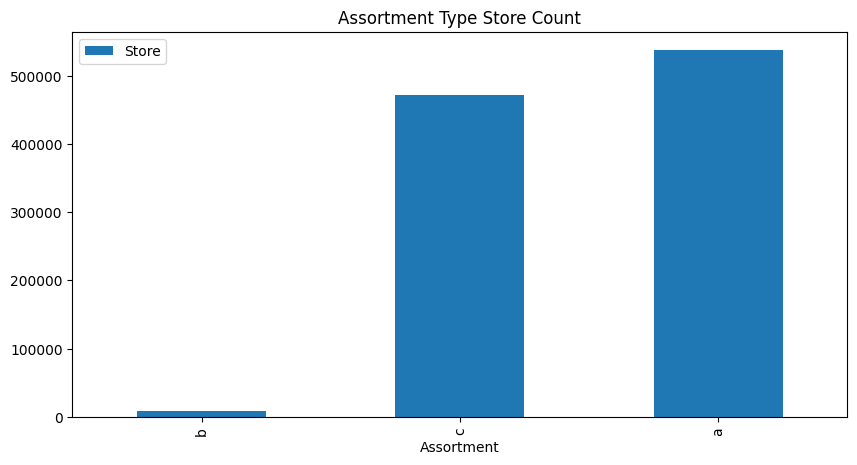

In [79]:
assrt_store_count.sort_values('Store').plot(kind = 'bar', x = 'Assortment', y = 'Store')
plt.title('Assortment Type Store Count')
plt.show()

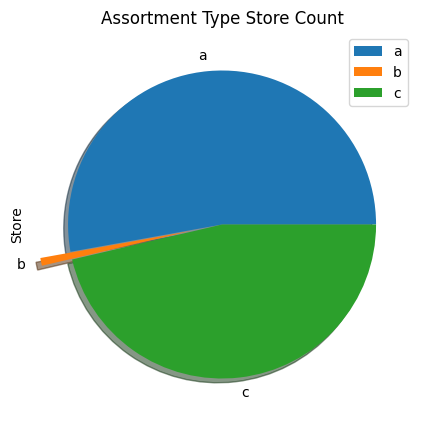

In [80]:
myexplode = [0, 0.2, 0]
assrt_store_count.plot(kind = 'pie',  x = 'Assortment', y = 'Store', labels = assrt_store_count['Assortment'], explode = myexplode, shadow = True)
plt.title('Assortment Type Store Count')
plt.show()

In [81]:
# Assortment type sales value
assrt_sale_count = combined_dataset.groupby('Assortment')['Sales'].count().reset_index()
assrt_sale_count

,Assortment,Sales
0,a,537445
1,b,8294
2,c,471470


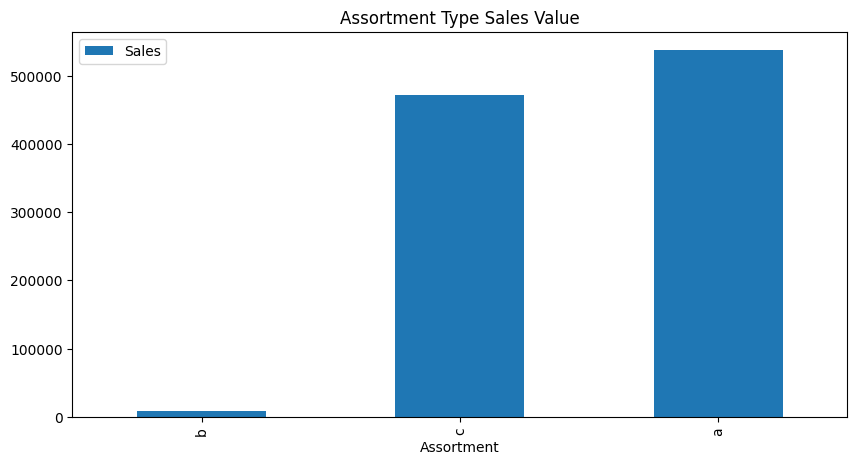

In [82]:
assrt_sale_count.sort_values('Sales').plot(kind = 'bar', x = 'Assortment', y = 'Sales')
plt.title('Assortment Type Sales Value')
plt.show()

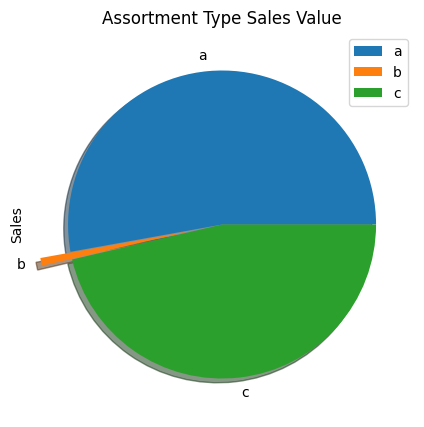

In [83]:
myexplode = [0, 0.2, 0]
assrt_sale_count.plot(kind = 'pie',  x = 'Assortment', y = 'Sales', labels = assrt_store_count['Assortment'], explode = myexplode, shadow = True)
plt.title('Assortment Type Sales Value')
plt.show()

### **4.7 Store wise customer count**

In [84]:
# Store wise customer count
store_customer_count = combined_dataset.groupby('Store')['Customers'].sum().reset_index()
store_customer_count

,Store,Customers
0,1,440523
1,2,457855
2,3,584310
3,4,1036254
4,5,418588
...,...,...
1110,1111,351883
1111,1112,653276
1112,1113,562151
1113,1114,2509542


In [85]:
store_customer_count.sort_values('Customers',ascending=False)

,Store,Customers
732,733,3206058
261,262,3204694
561,562,2924960
768,769,2902351
1113,1114,2509542
...,...,...
701,702,215970
572,573,208622
253,254,201507
406,407,195715


### **4.8 Store wise promo count**

In [86]:
# Store wise promos
store_wise_promo = combined_dataset.groupby('Store')['Promo'].sum().reset_index()
store_wise_promo

,Store,Promo
0,1,360
1,2,360
2,3,360
3,4,360
4,5,360
...,...,...
1110,1111,360
1111,1112,360
1112,1113,360
1113,1114,360


In [87]:
store_wise_promo.sort_values('Promo', ascending=False)

,Store,Promo
0,1,360
725,726,360
707,708,360
708,709,360
712,713,360
...,...,...
637,638,286
636,637,286
635,636,286
940,941,286


We can observe a clear difference in the number of promos given by stores.

The maximum number of promos given by some of the stores is 360, while minimum is 286.

In [88]:
# The promos given by the most and least successful stores.
# Store number 262 (most) and 307 (least) in terms of sales.

print(f" The Promos given by the most successful store: {combined_dataset[combined_dataset['Store']==262]['Promo'].sum()}")
print(f" The Promos given by the least successful store: {combined_dataset[combined_dataset['Store']==307]['Promo'].sum()}")

 The Promos given by the most successful store: 360
 The Promos given by the least successful store: 360


Interestingly, the no. of promos given by most and least successful stores are same.

### **4.8 Average competition distance vs Sales**

In [89]:
# Finding the avg distance from competitor to each store
comp_dist = combined_dataset.groupby('Store')['CompetitionDistance'].mean().reset_index()
comp_dist.head()

,Store,CompetitionDistance
0,1,1270.0
1,2,570.0
2,3,14130.0
3,4,620.0
4,5,29910.0


In [90]:
comp_dist.sort_values('CompetitionDistance')

,Store,CompetitionDistance
515,516,20.0
881,882,30.0
1007,1008,30.0
620,621,30.0
987,988,30.0
...,...,...
746,747,45740.0
109,110,46590.0
800,801,48330.0
121,122,58260.0


Store 453 is far away from from competitors.

Store 516 is close to competitors.

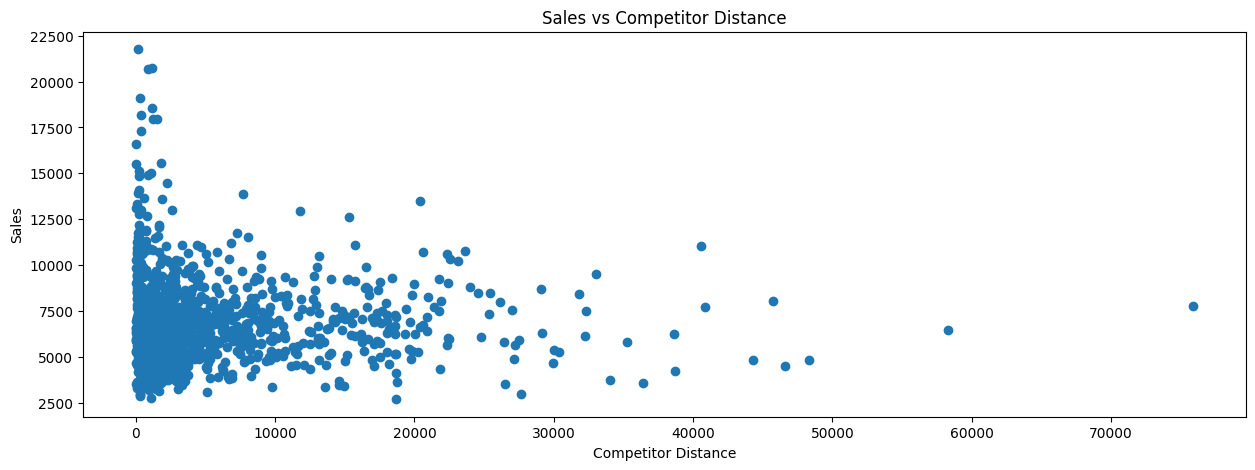

In [91]:
# Let's look at how sales vary with competitors distance
plt.rcParams['figure.figsize'] = (15,5)
plt.scatter(x= comp_dist['CompetitionDistance'], y = avgsale_open_days['Sales']) # Refer 4.2.3
plt.title('Sales vs Competitor Distance')
plt.xlabel('Competitor Distance')
plt.ylabel('Sales')
plt.show()

Interesting Observation!!!

We can see from the graph that stores which are close to competitors are doing well interms of sales than stores that are far away from competitors.

The reason for it may be that the stores that are doing well are situated in urban areas.

### **4.11 Analysising the Correlation between different features (numeric)**

In [92]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [93]:
# Correlation bw numeric columns
correlation_matrix = combined_dataset.corr()
correlation_matrix

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026451,-0.037472,-0.000224,0.008488,0.011053,0.008520,0.000290,0.000871,0.000235
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000003,-0.000022,0.000168,0.000208,0.000168,0.001937,0.007618,0.000163
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.018869,-0.023226,0.008740,-0.091040,-0.044143,-0.091056,0.023519,-0.003183,0.007839
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102362,-0.024093,0.006541,-0.150159,-0.098323,-0.150138,-0.001212,0.011464,0.005392
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007987,0.001436,0.002557,-0.008309,-0.007436,-0.008308,-0.001009,0.023690,0.023329
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000140,-0.000008,0.000130,-0.000983,-0.001210,-0.000983,0.024300,-0.126888,-0.061952
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003666,0.000124,0.001841,-0.006909,-0.006679,-0.006912,-0.036535,0.076096,0.039095
CompetitionDistance,-0.026451,-0.000025,-0.018869,-0.102362,0.007987,0.000140,-0.003666,1.000000,-0.048941,0.020309,-0.139227,-0.122924,-0.139291,0.000710,0.002143,0.000573
CompetitionOpenSinceMonth,-0.037472,0.000003,-0.023226,-0.024093,0.001436,-0.000008,0.000124,-0.048941,1.000000,0.058298,0.021534,0.019623,0.021544,-0.000042,-0.000129,-0.000033
CompetitionOpenSinceYear,-0.000224,-0.000022,0.008740,0.006541,0.002557,0.000130,0.001841,0.020309,0.058298,1.000000,-0.022581,-0.027371,-0.022601,0.000657,0.001981,0.000531


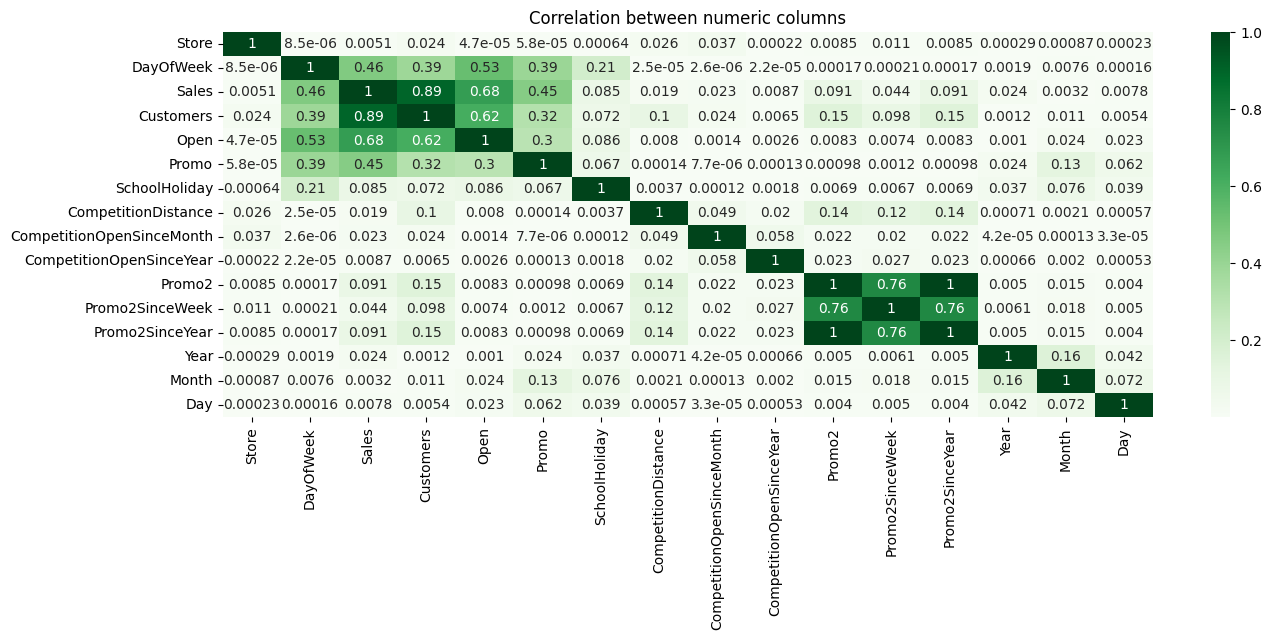

In [94]:
# Heatmap for correlation matrix
sns.heatmap(abs(correlation_matrix), annot=True, cmap='Greens')
plt.title('Correlation between numeric columns')
plt.show()

From the heatmap, we can observe that 'DayOfWeek', 'Customers', 'Open', 'Promo' (among numeric features) are highly correlated to 'Sales'.

## **5.Featre Engineering**

### **5.1 Outlier Handling**

In [95]:
# Getting numeric columns
numeric_features = combined_dataset.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day'],
      dtype='object')

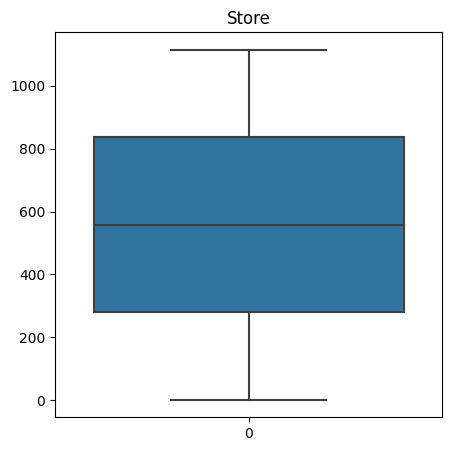

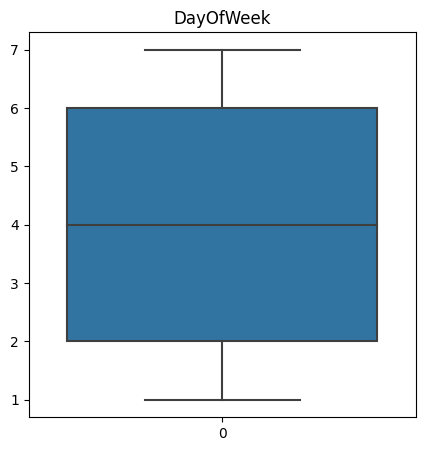

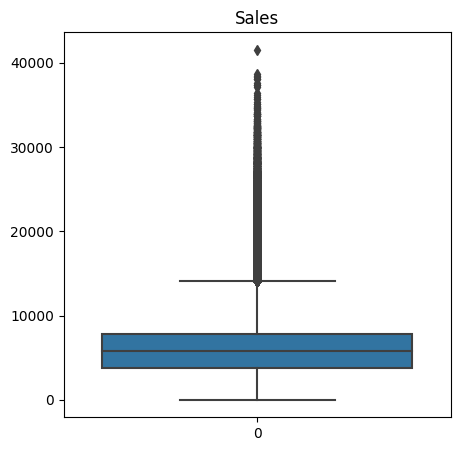

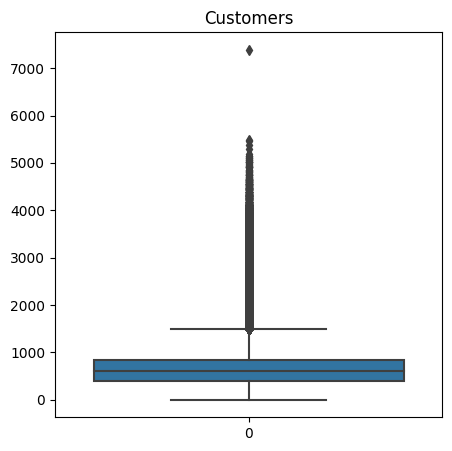

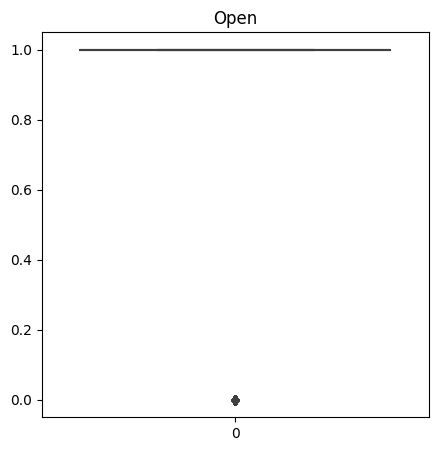

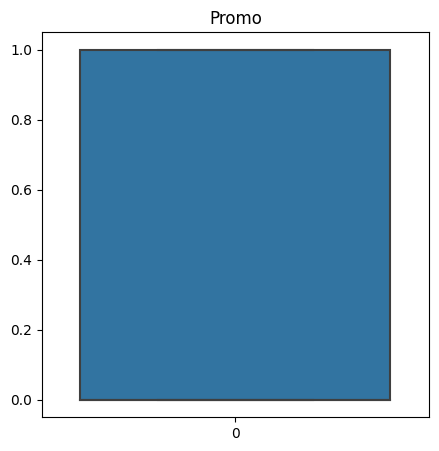

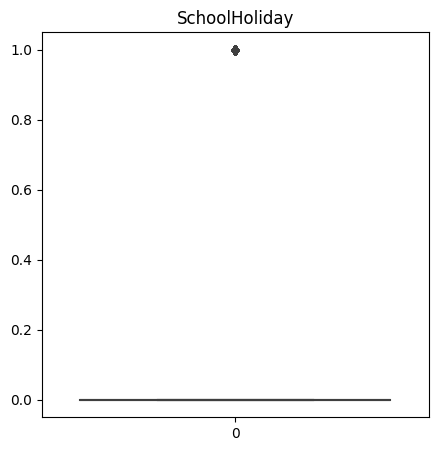

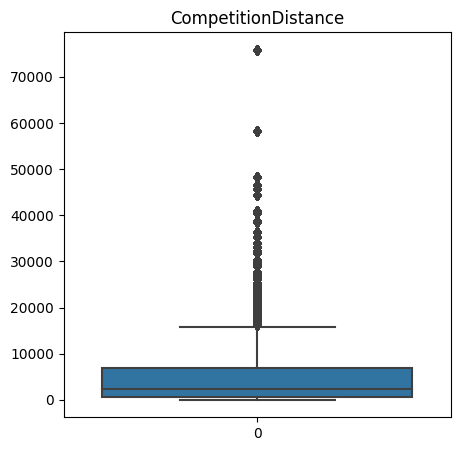

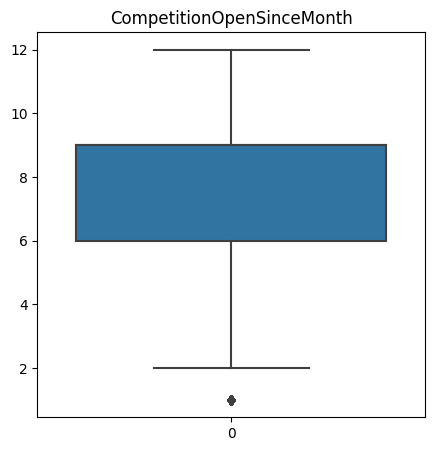

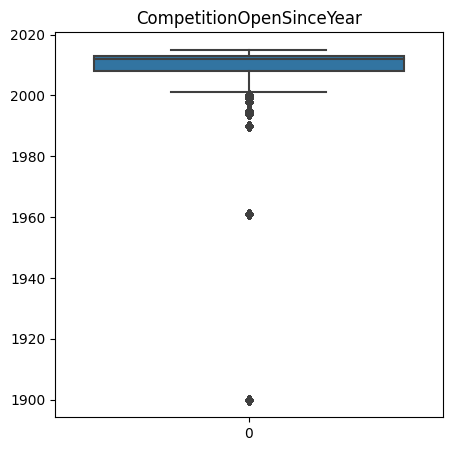

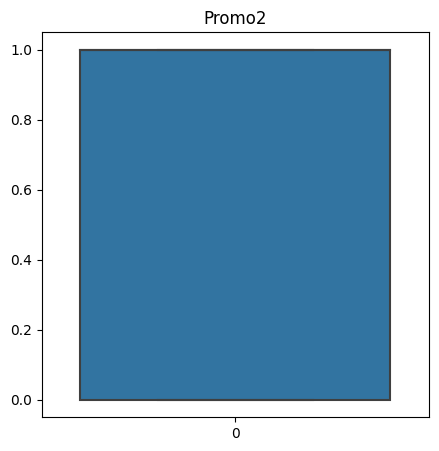

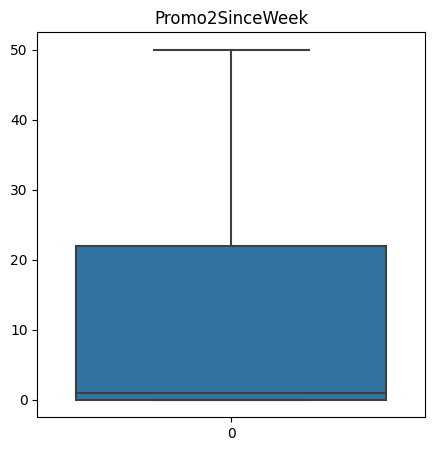

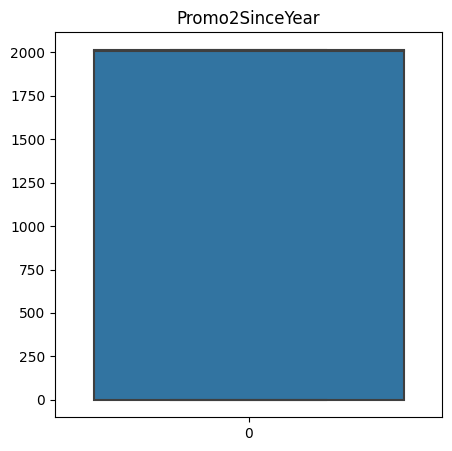

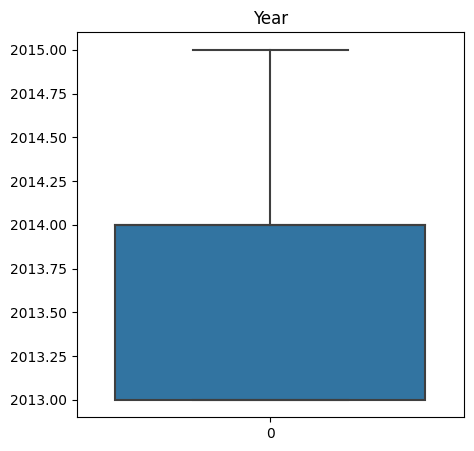

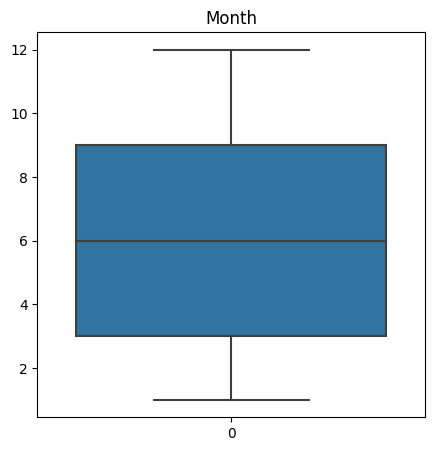

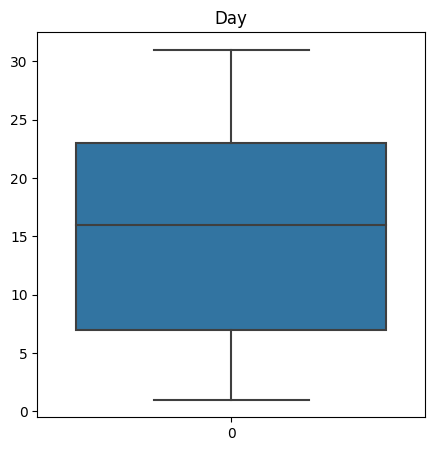

In [96]:
# Only original numeric features have outliers
for col in numeric_features:
  plt.figure(figsize=(5,5))
  # plt.rcParams['figure.figsize'] = (10,5)
  sns.boxplot(combined_dataset[col])
  plt.title(col)

From the box plots above we can clearly observe that the following variables have outliers:
1. Customers
2. Competiton Distance
3. CompetitionOpenSinceMonth
4. CompetitionOpenSinceYear
5. Sales (Dependent Variable)

But the number of outliers in 'Customers' and 'Sales' is huge and also their presence is quite uniform. Removing the outliers from 'Customers' and 'Sales' can lead to loss of data and important patterns. So, let's not remove them.

We can remove outliers from 'Competiton Distance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'.


In [97]:
# Removing outliers from copy dataset using IQR method
for col in ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']:
  Q1 = combined_dataset[col].quantile(0.25) # Calculating first Q1 and Q3 using quantile method
  Q3 = combined_dataset[col].quantile(0.75)

  IQR = Q3-Q1 # Interquartile Range represents the range in which the central 50% of the data is concentrated.

  upper_limit = Q3+(1.5*IQR) # Calculating upper_limit and lower_limit
  lower_limit = Q1-(1.5*IQR)

  # Replacing the outliers with upper_limit and lower_limit
  combined_dataset.loc[(combined_dataset[col] > upper_limit),col] = upper_limit
  combined_dataset.loc[(combined_dataset[col] < lower_limit),col] = lower_limit


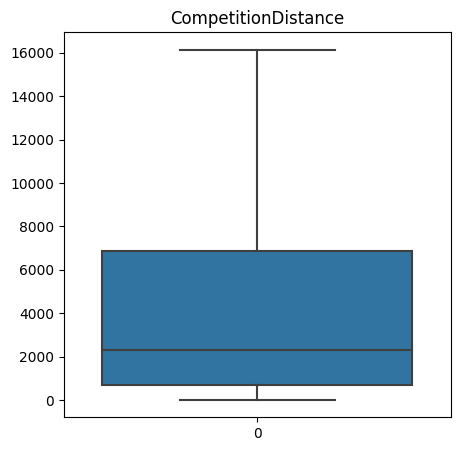

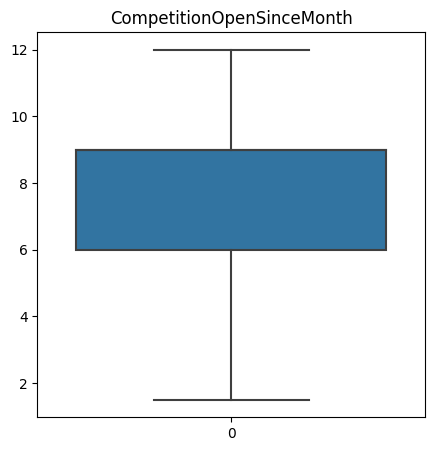

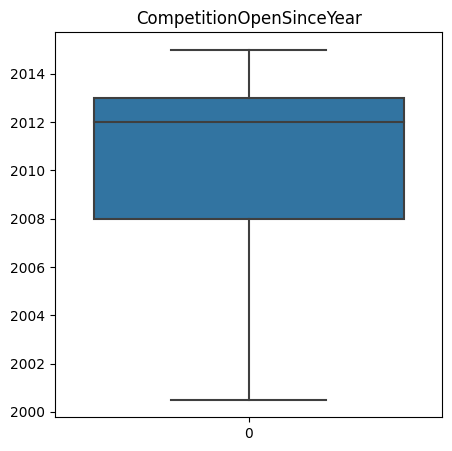

In [98]:
# Only original numeric features have outliers
for col in ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']:
  plt.figure(figsize=(5,5))
  # plt.rcParams['figure.figsize'] = (10,5)
  sns.boxplot(combined_dataset[col])
  plt.title(col)

We can observe that, all outliers have been removed

### **5.2 OneHot Encoding**

In [99]:
# Getting categorical columns
categorical_features = combined_dataset.describe(include = 'O').columns
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [100]:
# OneHot Encoding to convert categorical columns into numeric features
combined_dataset = pd.get_dummies(combined_dataset, columns = categorical_features)
combined_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,0,0,0,1,0,0,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,0,0,0,1,0,0,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,0,1,0,0,0,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,16135.0,4.0,...,0,0,0,1,0,0,1,0,0,0


In [101]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 33 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  float64       
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

### **5.3 Featre Selection**

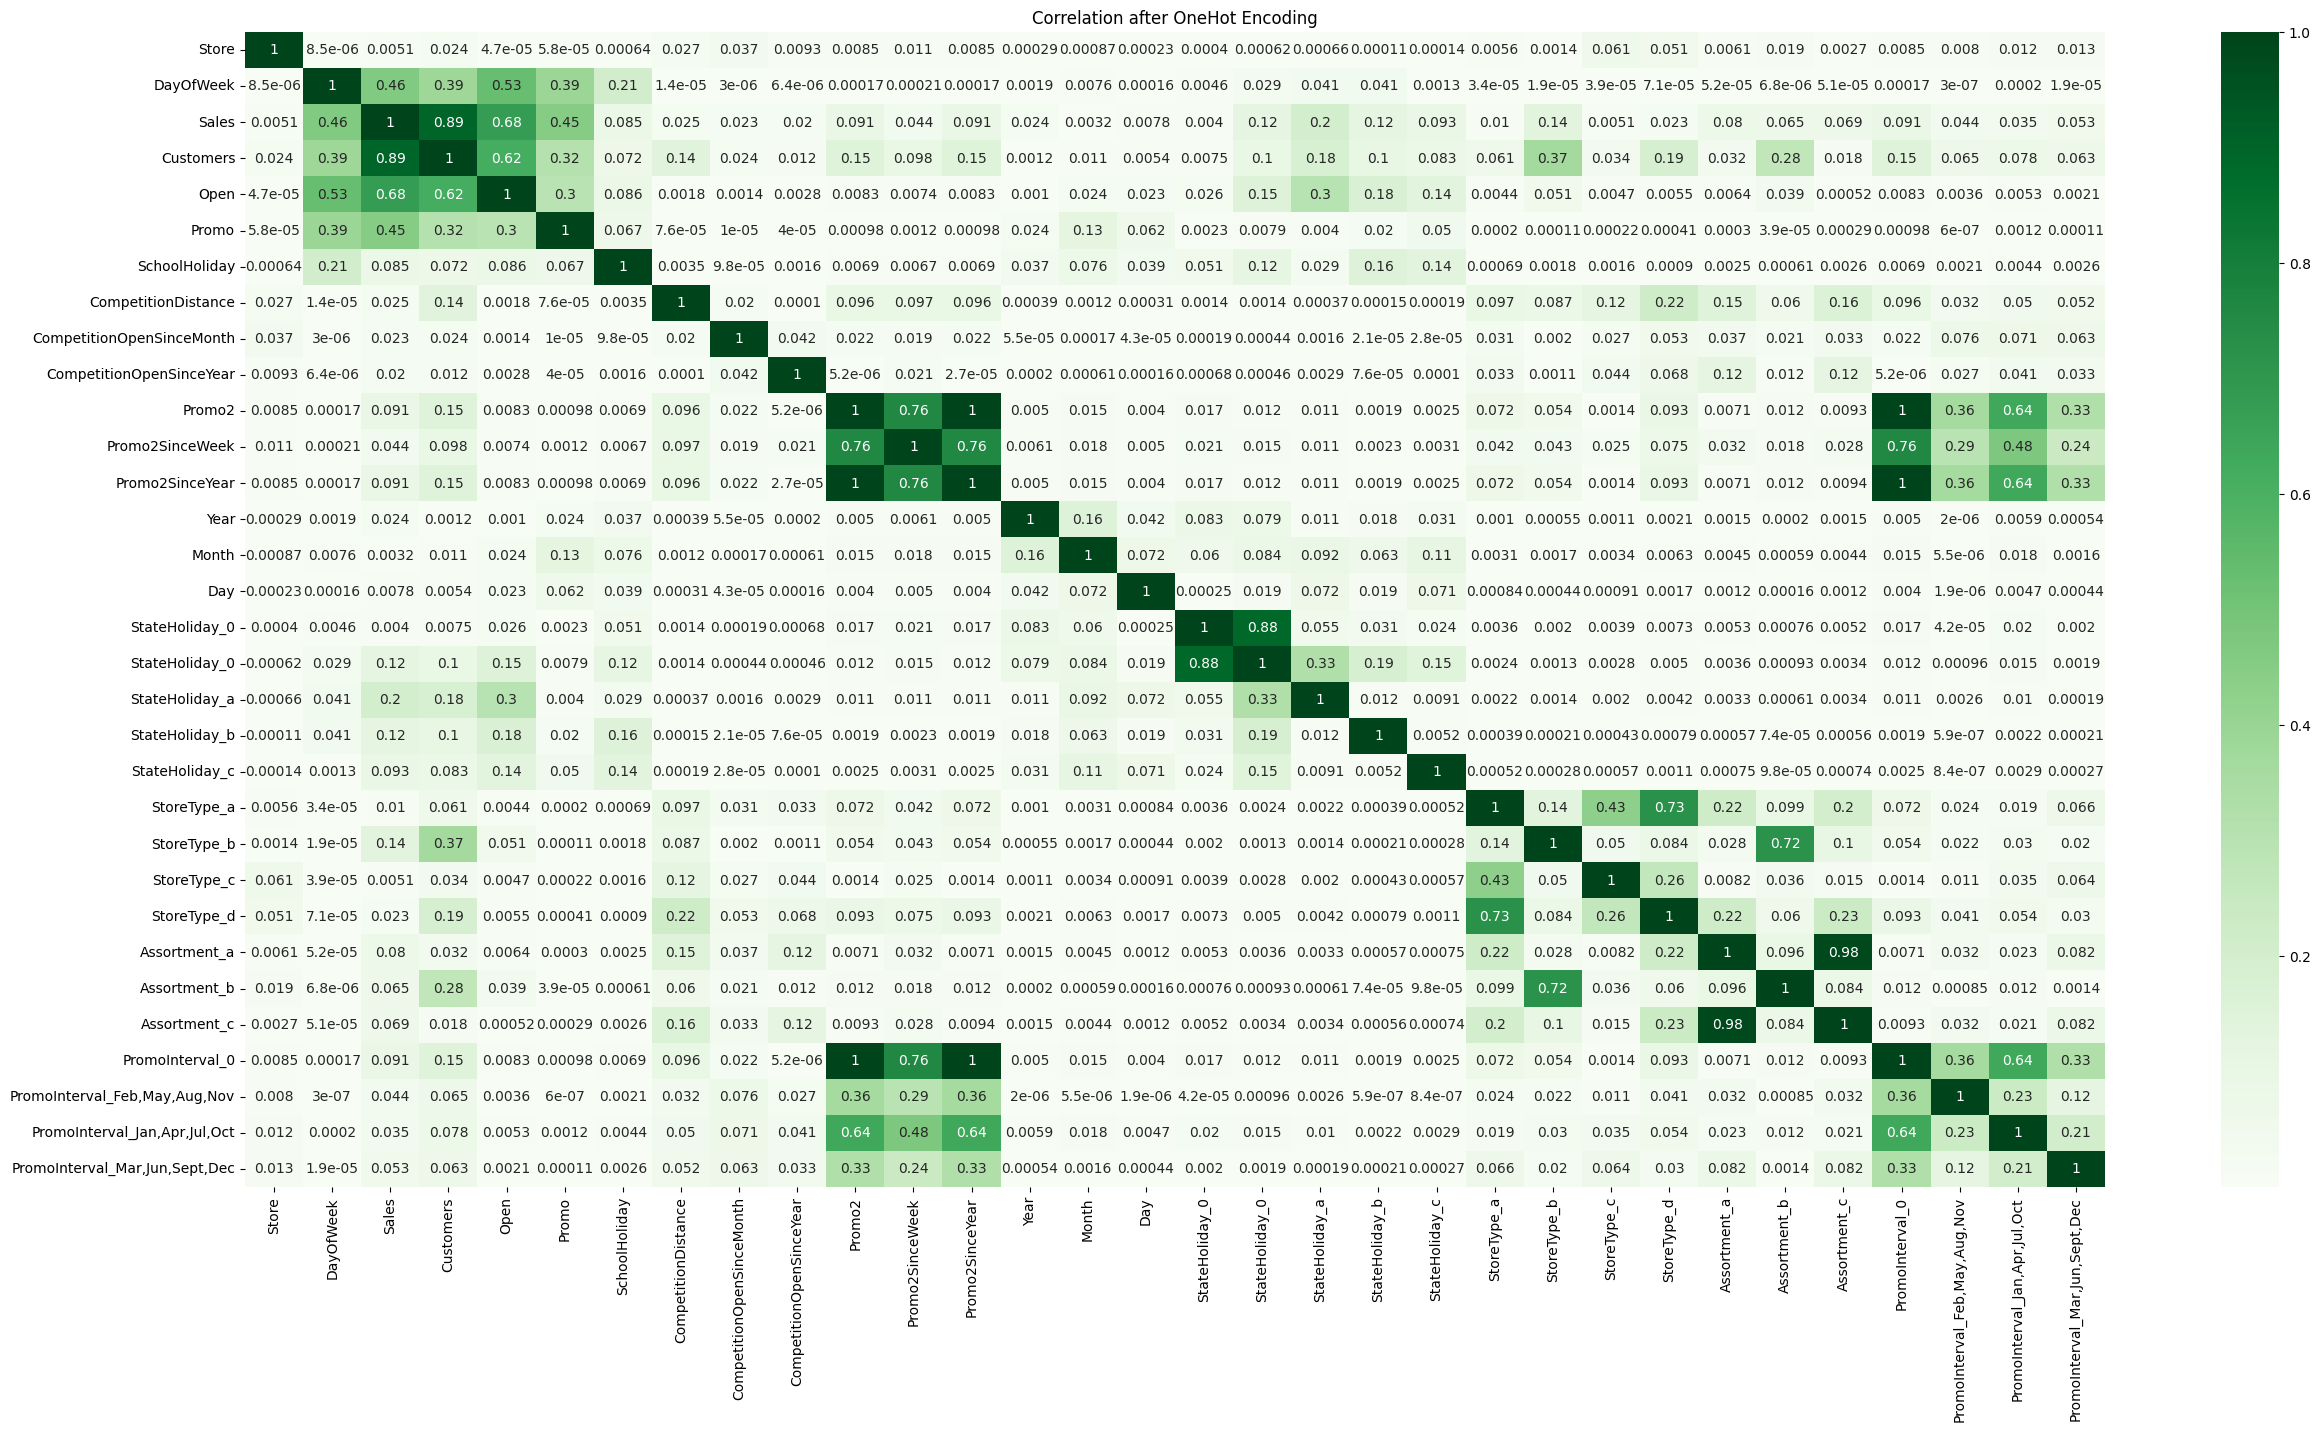

In [102]:
# Selecting the important features by eliminating the less important ones by finding the correlation with Sales
plt.figure(figsize = (30,15))
correlation_matrix = combined_dataset.corr()
sns.heatmap(abs(correlation_matrix), annot=True, cmap='Greens')
plt.title('Correlation after OneHot Encoding')
plt.show()

In [103]:
# Keeping the threshold correlation value as 0.025 and removing columns with correlation (to 'Sales') less than 0.025
unimp_features = ['Store', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Year', 'Month',
                  'Day', 'StateHoliday_0', 'StoreType_a', 'StoreType_c', 'StoreType_d', 'Sales']

In [104]:
len(unimp_features)

11

In [105]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_dataset = pd.DataFrame()
    vif_dataset["variables"] = X.columns
    vif_dataset["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return(vif_dataset)

In [106]:
vif_dataset = calculate_vif(combined_dataset[[i for i in combined_dataset.describe().columns if i not in unimp_features]])
vif_dataset.sort_values('VIF', ascending = False)

,variables,VIF
19,"PromoInterval_Mar,Jun,Sept,Dec",inf
13,Assortment_a,inf
18,"PromoInterval_Jan,Apr,Jul,Oct",inf
17,"PromoInterval_Feb,May,Aug,Nov",inf
16,PromoInterval_0,inf
6,Promo2,inf
15,Assortment_c,inf
14,Assortment_b,inf
8,Promo2SinceYear,8.006779e+05
7,Promo2SinceWeek,2.528895e+00


In [107]:
unimp_features.extend(['PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Feb,May,Aug,Nov',
                      'PromoInterval_0', 'Promo2', 'Assortment_c', 'Assortment_b', 'Assortment_a'])
unimp_features

['Store',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Year',
 'Month',
 'Day',
 'StateHoliday_0',
 'StoreType_a',
 'StoreType_c',
 'StoreType_d',
 'Sales',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_0',
 'Promo2',
 'Assortment_c',
 'Assortment_b',
 'Assortment_a']

In [108]:
vif_dataset = calculate_vif(combined_dataset[[i for i in combined_dataset.describe().columns if i not in unimp_features]])
vif_dataset.sort_values('VIF', ascending = False)

,variables,VIF
2,Open,8.643296
1,Customers,6.250255
7,Promo2SinceYear,4.754669
6,Promo2SinceWeek,3.731965
0,DayOfWeek,2.627404
3,Promo,1.933365
5,CompetitionDistance,1.825040
4,SchoolHoliday,1.312911
11,StoreType_b,1.262040
8,StateHoliday_a,1.065025


In [109]:
imp_features = ['Open', 'Customers', 'Promo2SinceYear', 'Promo2SinceWeek', 'DayOfWeek',
                'Promo', 'CompetitionDistance', 'SchoolHoliday', 'StoreType_b', 'StateHoliday_b',
                'StateHoliday_a', 'StateHoliday_c']

In [110]:
# imp_features = ['Open', 'Customers', 'DayOfWeek', 'Promo', 'StoreType_b', 'StateHoliday_a', 'StateHoliday_b']

<Axes: >

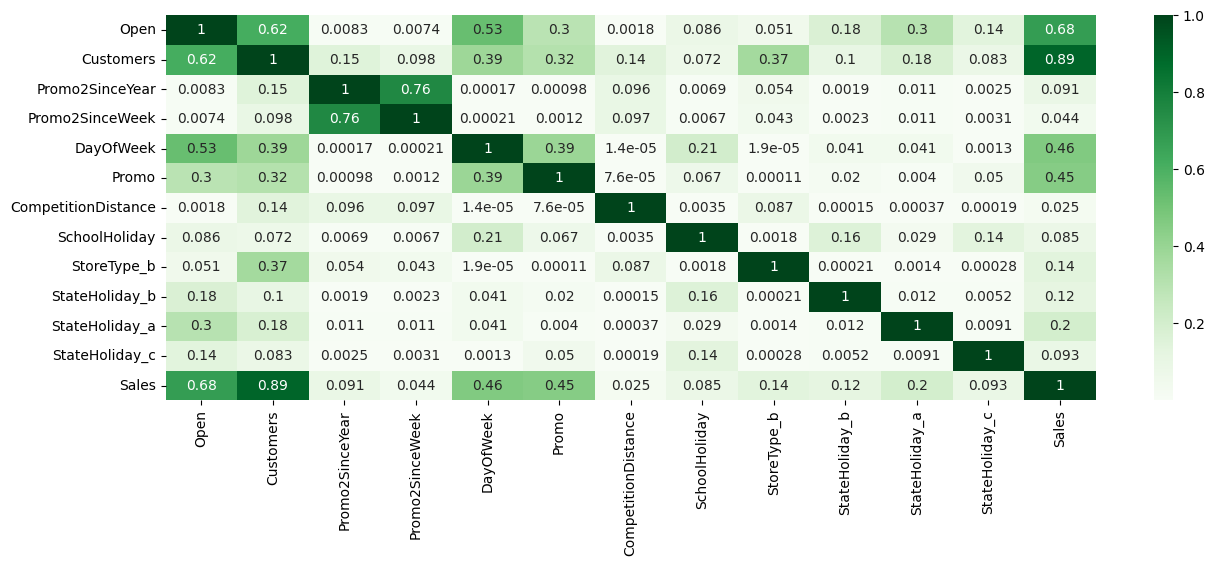

In [111]:
# Correlation
plt.figure(figsize=(15,5))
imp_features.append('Sales')
correlation_matrix = combined_dataset[imp_features].corr()
sns.heatmap(abs(correlation_matrix), annot=True, cmap='Greens')

In [112]:
imp_features.remove('Sales')

In [113]:
imp_features

['Open',
 'Customers',
 'Promo2SinceYear',
 'Promo2SinceWeek',
 'DayOfWeek',
 'Promo',
 'CompetitionDistance',
 'SchoolHoliday',
 'StoreType_b',
 'StateHoliday_b',
 'StateHoliday_a',
 'StateHoliday_c']

In [114]:
combined_dataset[imp_features].head()

,Open,Customers,Promo2SinceYear,Promo2SinceWeek,DayOfWeek,Promo,CompetitionDistance,SchoolHoliday,StoreType_b,StateHoliday_b,StateHoliday_a,StateHoliday_c
0,1,555,0.0,0.0,5,1,1270.0,1,0,0,0,0
1,1,625,2010.0,13.0,5,1,570.0,1,0,0,0,0
2,1,821,2011.0,14.0,5,1,14130.0,1,0,0,0,0
3,1,1498,0.0,0.0,5,1,620.0,1,0,0,0,0
4,1,559,0.0,0.0,5,1,16135.0,1,0,0,0,0


## **6. Modelling**


In [115]:
# Input or independent variables
X = combined_dataset[imp_features]

# Target varibale
y = combined_dataset['Sales']

In [116]:
# Splitting the data into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [117]:
# Feature Scaling of training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **6.1 Linear Regression**

In [118]:
start_time = time.time()

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting the y on train data and test data
y_pred_train_lr = linear_reg.predict(X_train)
y_pred_test_lr = linear_reg.predict(X_test)

# Printing the predictions
print(f'y pred on train data {y_pred_train_lr} \n')
print(f'y pred on test data {y_pred_test_lr} \n')

end_time = time.time()
lr_time = end_time - start_time

print(f'Time taken by linear regression: {lr_time}')

y pred on train data [5864.80369651 -165.68657784 4068.23322426 ... 7616.56630062 3322.447713
 6669.53435068] 

y pred on test data [7455.85816776 7760.21690605 9677.89830735 ... 7043.83661387 6484.8755768
 3419.30041917] 

Time taken by linear regression: 0.7426285743713379


In [119]:
from sklearn.metrics import r2_score
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f'Train R2 {r2_train_lr}')
print(f'Test R2 {r2_test_lr}')

Train R2 0.8836189599670917
Test R2 0.8837113822922069


In [120]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr, squared=False)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr, squared=False)

print(f'Train MSE {mse_train_lr}')
print(f'Test MSE {mse_test_lr}')

Train MSE 1313.8888142196936
Test MSE 1310.8646961513916


In [121]:
linear_reg_data = pd.DataFrame(zip(y_test, y_pred_test_lr), columns = ['Actual', 'Predicted'])
linear_reg_data.head()

,Actual,Predicted
0,7285,7455.858168
1,6221,7760.216906
2,8132,9677.898307
3,20916,11357.219131
4,5472,6703.673356


### **6.2 Random Forest**

In [122]:
start_time = time.time()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

random_forest = RandomForestRegressor()
parameters = {'max_depth': [10, None],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [3, 5],
              'max_leaf_nodes': [50, 75],
              'max_features': ['sqrt', 'log2']
              }
random_forest_cv = RandomizedSearchCV(random_forest, parameters, cv=3)
random_forest_cv.fit(X_train, y_train)

# predict the train and test data
y_pred_train_rf = random_forest_cv.predict(X_train)
y_pred_test_rf = random_forest_cv.predict(X_test)

print(f'y pred on train data {y_pred_train_rf} \n')
print(f'y pred on test data {y_pred_test_rf} \n')

end_time = time.time()
rf_time = end_time - start_time
print(f'Time taken by Random Forest ML model: {rf_time}')

y pred on train data [5689.57595019   18.6235253  5079.27690936 ... 7602.90589    4196.73038103
 6100.70887682] 

y pred on test data [7455.26258264 9918.54268731 9026.57688866 ... 6464.28987677 6243.79084909
 2672.49140035] 

Time taken by Random Forest ML model: 1191.6422400474548


In [123]:
# Accessing the best hyperparameters
best_params_rf = random_forest_cv.best_params_

# Accessing the best model
best_random_forest_cv = random_forest_cv.best_estimator_

In [124]:
from sklearn.metrics import r2_score
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f'Train R2 {r2_train_rf}')
print(f'Test R2 {r2_test_rf}')

Train R2 0.8655309932502441
Test R2 0.8649177303485615


In [125]:
from sklearn.metrics import mean_squared_error
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

print(f'Train MSE {mse_train_rf}')
print(f'Test MSE {mse_test_rf}')

Train MSE 1412.305325738636
Test MSE 1412.8252165825054


In [126]:
random_forest_data = pd.DataFrame(zip(y_test, y_pred_test_rf), columns = ['Actual', 'Predicted'])
random_forest_data.head()

,Actual,Predicted
0,7285,7455.262583
1,6221,9918.542687
2,8132,9026.576889
3,20916,12340.410554
4,5472,7267.290019


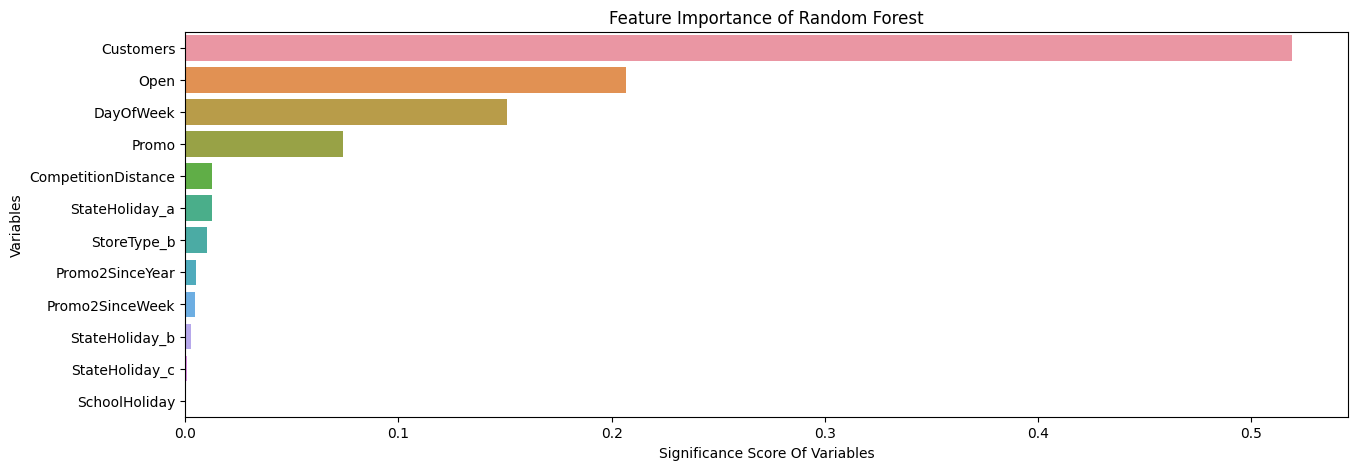

In [127]:
best_random_forest_cv = random_forest_cv.best_estimator_
feature_imp = pd.Series(best_random_forest_cv.feature_importances_, index= X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Feature Importance of Random Forest")
plt.show()

### **6.3 XGBoost**

In [128]:
start_time = time.time()

# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:linear')

param_grid = {'n_estimators': [150, 175],                     # Number of boosting rounds
              'max_depth': [10, 12],                          # Maximum depth of each tree
              'max_leaf_nodes': [50, 60],                     # Maximum number of leaf nodes
              'max_features': ['sqrt', 'log2'],               # Maximum number of features for splitting
              'min_samples_leaf': [5, 7],                     # Minimum number of samples at a leaf node
              'min_samples_split': [4, 6],                    # Minimum number of samples to split an internal node
              'learning_rate': [0.2, 0.4],                    # Step size shrinkage used in update
              'gamma': [0.01, 0.02],                          # Regularization term for controlling the number of splits
              'lambda': [4, 5],                               # L2 regularization term on weights
              'colsample_bytree': [0.6, 0.7],                 # Fraction of features used for training the trees
              'subsample': [0.85, 0.9]                        # Fraction of samples used for training the trees
              }

xgb_reg_cv = RandomizedSearchCV(xgb_reg, param_grid, cv=3)
xgb_reg_cv.fit(X_train, y_train)

# predict the train and test data
y_pred_train_xgb = xgb_reg_cv.predict(X_train)
y_pred_test_xgb = xgb_reg_cv.predict(X_test)

end_time = time.time()
xgb_time = end_time - start_time
print(f'Time taken by XGBoost ML model: {xgb_time}')

Time taken by XGBoost ML model: 508.2393639087677


In [129]:
# Accessing the best hyperparameters
best_params_xgb = xgb_reg_cv.best_params_
print(best_params_xgb)
# Accessing the best model
best_xgb_reg_cv = xgb_reg_cv.best_estimator_

{'subsample': 0.85, 'n_estimators': 175, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_leaf_nodes': 60, 'max_features': 'sqrt', 'max_depth': 12, 'learning_rate': 0.2, 'lambda': 4, 'gamma': 0.02, 'colsample_bytree': 0.7}


In [130]:
from sklearn.metrics import r2_score
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f'Train R2 {r2_train_xgb}')
print(f'Test R2 {r2_test_xgb}')
#Train R2 0.9709248618263692
# Test R2 0.9676849254512743

Train R2 0.9768776531016136
Test R2 0.9719738506146836


In [131]:
from sklearn.metrics import mean_squared_error
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb, squared=False)

print(f'Train MSE {mse_train_xgb}')
print(f'Test MSE {mse_test_xgb}')

# Train MSE 656.7172014930671
# Test MSE 691.0219524368196


Train MSE 585.6436714236401
Test MSE 643.5332331107027


In [132]:
xgb_data = pd.DataFrame(zip(y_test, y_pred_test_xgb), columns = ['Actual', 'Predicted'])
xgb_data.head()

,Actual,Predicted
0,7285,7339.615234
1,6221,6603.202637
2,8132,8761.526367
3,20916,18339.769531
4,5472,5672.128906


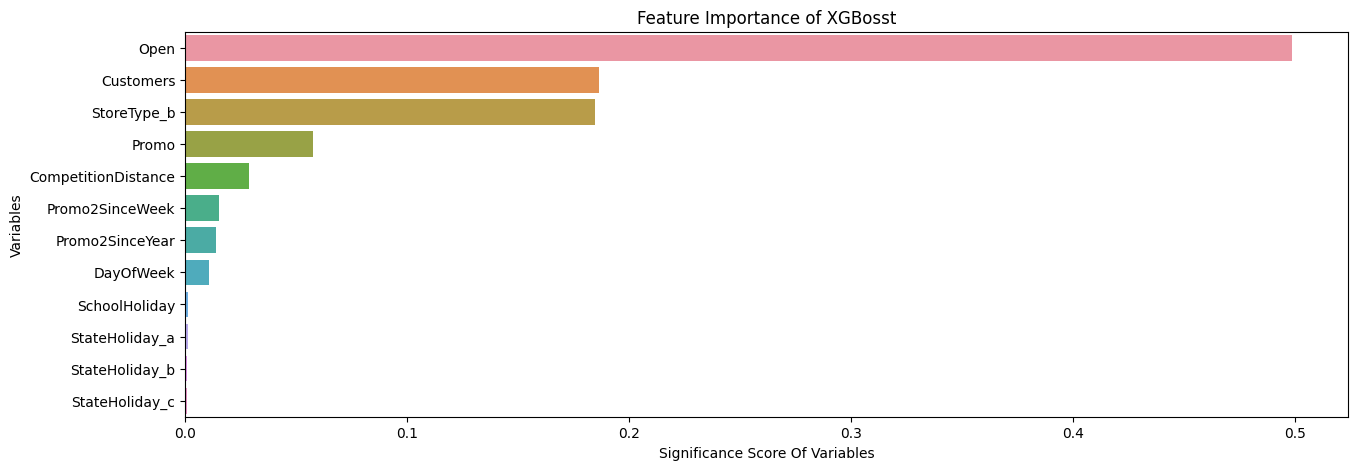

In [133]:
best_xgb_reg_cv = xgb_reg_cv.best_estimator_
feature_imp = pd.Series(best_xgb_reg_cv.feature_importances_, index= X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Feature Importance of XGBosst")
plt.show()

### **6.4 Models Comparision**

In [134]:
# Creating metrics table; From Dictionary to DataFrame
metrics_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Train R2': [r2_train_lr,  r2_train_rf, r2_train_xgb],
    'Test R2': [r2_test_lr,  r2_test_rf, r2_test_xgb],
    'Train MSE': [mse_train_lr,  mse_train_rf, mse_train_xgb],
    'Test MSE': [mse_test_lr,  mse_test_rf, mse_test_xgb],
    'Time in minutes':[lr_time/60, rf_time/60, xgb_time/60]
    })

metrics_table.set_index('Model', inplace = True)

In [135]:
metrics_table

,Train R2,Test R2,Train MSE,Test MSE,Time in minutes
Model,,,,,
Linear Regression,0.883619,0.883711,1313.888814,1310.864696,0.012377
Random Forest,0.865531,0.864918,1412.305326,1412.825217,19.860704
XGBoost,0.976878,0.971974,585.643671,643.533233,8.470656


<Axes: xlabel='Model'>

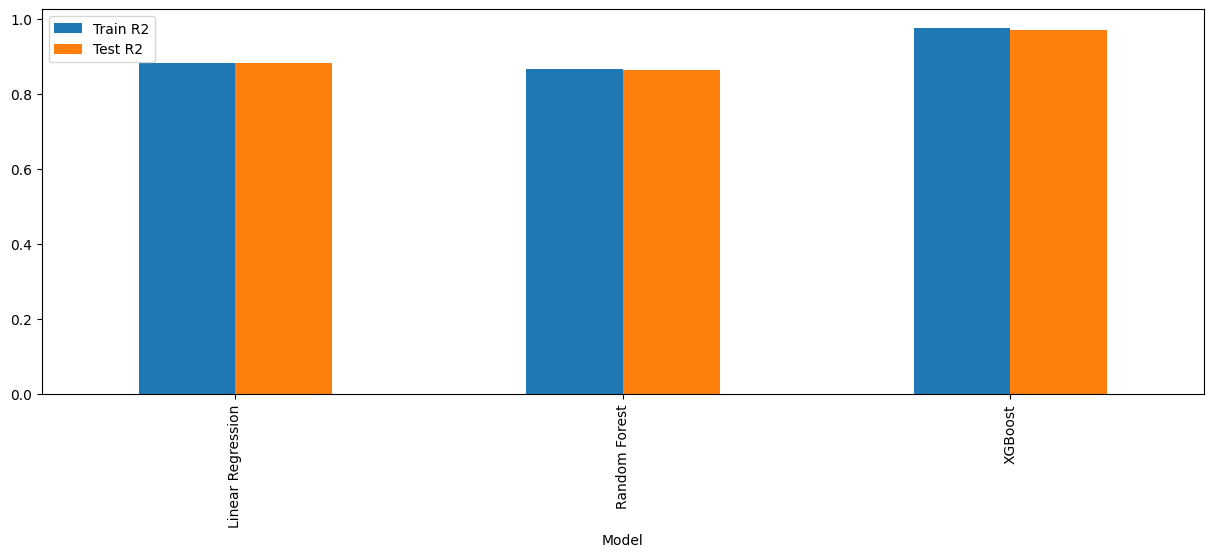

In [136]:
# Create a bar chart for Train and Test R2 metrics
metrics_table[['Train R2', 'Test R2']].plot(kind='bar')

<Axes: xlabel='Model'>

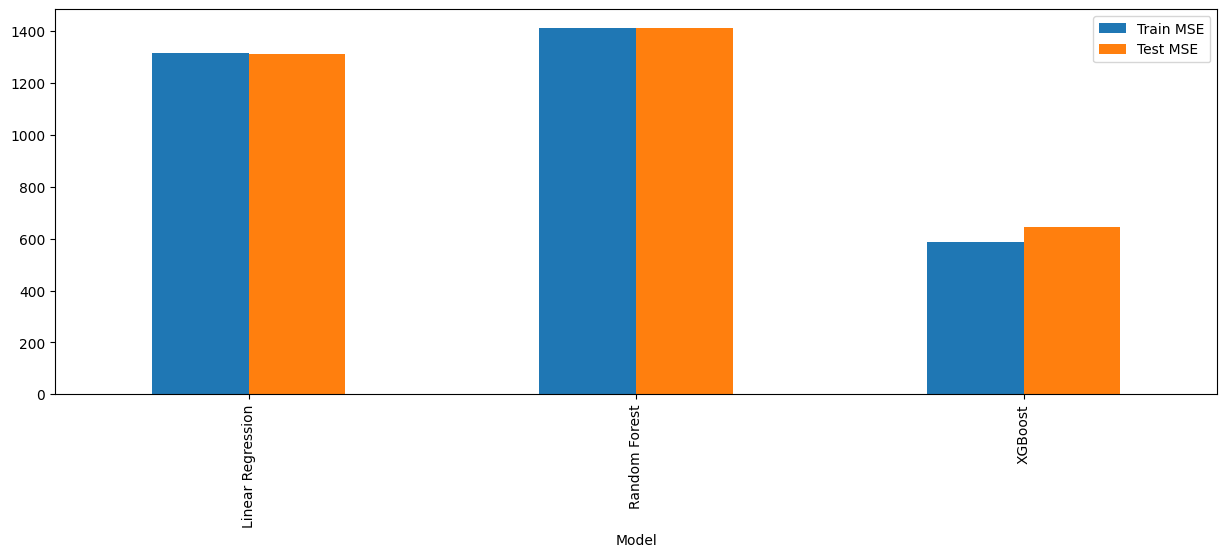

In [137]:
# Create a bar chart for Train and Test MSE metrics
metrics_table[['Train MSE', 'Test MSE']].plot(kind='bar')

<Axes: xlabel='Model'>

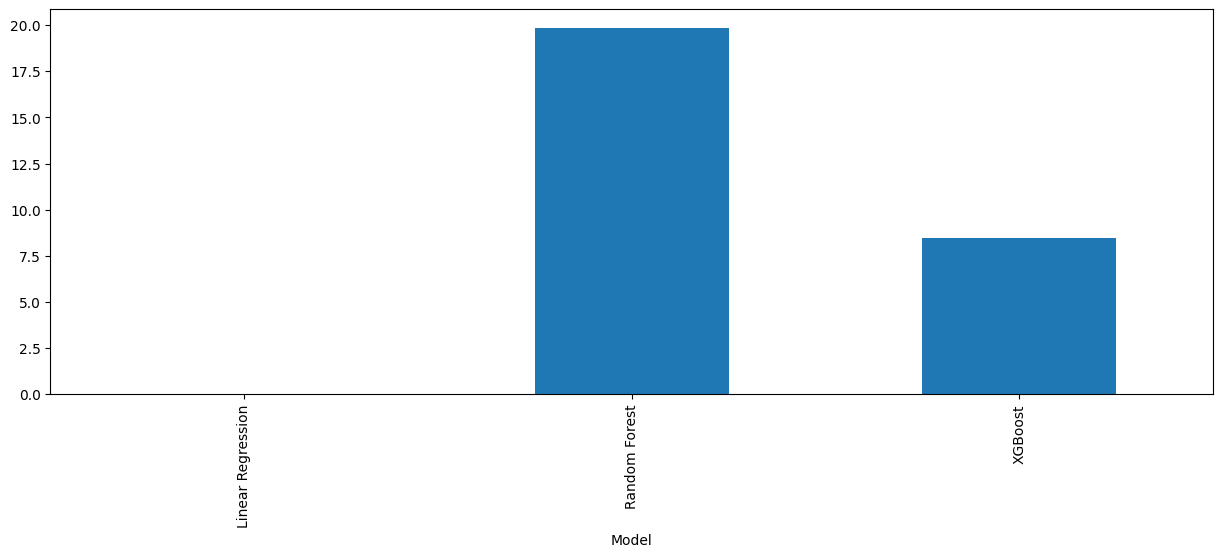

In [138]:
# Create a bar chart for Train and Test MSE metrics
metrics_table['Time in minutes'].plot(kind='bar')

XGBoost seems to be performing well.